# Indian Startup Data Analysis

# 1.0 Introduction

Hello everyone, welcome to my notebook for the Indian Startup Data Analysis Project. 

The objective of this project is to explore and find insights from the data on funding to Indian Startups from 2018 - 2021, and advice a team on their next steps as they try to venture into the Indian start-up ecosystem.

# 2.0 Ask

### 2.1 Hypothesis

 - H0: Funding to start-ups is centralized around a few locations and sectors
 - HA: Funding to start-ups is spread across different locations and sectors

### 2.2 Questions

To reach a final decision on whether or not to accept the hypothesis, the following questions will be answered:
1.	How has funding to startups changed over the period?
    -	By number of deals
    -	By value of deals
2.	How does location affect funding to startups?
3.	Which sectors are most favoured by investors?
    -	By number of deals
    -	By amounts invested
4.	Does the number of deals translate into funding for the sectors?
5.	What is the average amount of funding for start-ups in:
    -	The sector with the most funding?
    -	The location with the most funding?
6.	How does the breakdown by stages of funding look?
    -   By number of deals
    -   By value of deals
7.	Which start-ups were most favoured by investors?
    -	By number of deals
    -   By funding received

# 3.0 Prepare & Process (Data Cleaning & Preparation)

### 3.1 Loading the libraries and packages

In [1]:
# For data manipulation and cleaning
import pandas as pd
import numpy as np

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Other supporting libraries
import re
import warnings

# Hiding the warnings
warnings.filterwarnings('ignore')

print("Libraries and packages setup complete. Warnings hidden")

Libraries and packages setup complete. Warnings hidden


### 3.2 Loading the datasets

In [2]:
data_18 = pd.read_csv("startup_funding2018.csv") # for the 2018 startup data
data_19 =  pd.read_csv("startup_funding2019.csv") # for the 2019 startup data
data_20 = pd.read_csv("startup_funding2020.csv") # for the 2020 startup data
data_21 =  pd.read_csv("startup_funding2021.csv") # for the 2021 startup data

print("Datasets loaded.")

Datasets loaded.


### 3.3 Previewing the Datasets & Getting Summary Information

#### 3.3.1 The 2018 Dataset

In [3]:
print(data_18.info(), "\n")
data_18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
None 



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


#### 3.3.2 The 2019 Dataset

In [4]:
print(data_19.info(), "\n")
data_19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


#### 3.3.2 The 2020 Dataset

In [5]:
print(data_20.info(), "\n")
data_20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


#### 3.3.2 The 2021 Dataset

In [6]:
print(data_21.info(), "\n")
data_21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


### 3.4 Observations from previewing the datasets
**3.4.1 The 2018 DataFrame**
- The columns in 2018 are different from those of 2019 - 2021, meaning they have to be renamed for concatenation.
- The amounts in the 2018 DataFrame are a mix of Indian Rupees (INR) and US Dollars (USD), meaning they have to be converted into same currency.
- The industry and location columns have multiple information. A decision is to be made between selecting the first value before the separator(,) as the main value, or representing that column with a wordcloud.

**3.4.2 The 2019 DataFrame**
- The datatype of the "Founded" column is set to float64. It should be set to a string for uniformity.
- The headquarter column has multiple information. A decision is to be made between selecting the first value before the separator(,) as the main value, or representing that column with a wordcloud.

**3.4.3 The 2020 DataFrame**
- There is an extra column called "Unnamed:9", giving it a total of 10 columns. It should be dropped to ensure complete alignment with the other DataFrames for ease of concatenation.

**3.4.4 The 2021 DataFrame**
- The datatype of the "Founded" column is set to float64. It should be set to a string for uniformity.

**3.4.5 General Observations**
- The currency signs and commas have to be removed from each of amount column for each DataFrame.

### 3.5 Assumptions

- The 2018 average INR/USD rate will be used to convert the Indian Rupee values to US Dollars in the 2018 DataFrame.
- First values of industry and location in the 2018 data will be selected as the primary sector and headquarters respectively.
- Amounts without currency symbols are assumed to be in USD ($)
- Financial analysis will be narrowed to transactions whose amounts are available in the loaded data.

### 3.6 Acting on the Observations and Assumptions

#### 3.6.1 Processing the 2018 DataFrame

In [7]:
data_18

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [8]:
# Selecting the main industries of the startups as Industry
data_18['Industry'] = data_18['Industry'].apply(str)
data_18['Industry'] = data_18['Industry'].str.split(',').str[0]
data_18['Industry'] = data_18['Industry'].replace("'", "", regex=True)

# Selecting the main locations of the startups as Location
data_18['Location'] = data_18['Location'].apply(str)
data_18['Location'] = data_18['Location'].str.split(',').str[0]
data_18['Location'] = data_18['Location'].replace("'", "", regex=True)

data_18

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,—,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [9]:
# Cleaning the Amounts column
## Removing the commas and dashes from the Amounts
data_18['Amount'] = data_18['Amount'].apply(str)
data_18['Amount'].replace(",", "", inplace = True, regex=True)
data_18['Amount'].replace("—", 0, inplace = True, regex=True)
data_18['Amount'].replace("$", "", inplace = True, regex=True)

## Creating temporary columns to help with the conversion of INR to USD
data_18['INR Amount'] = data_18['Amount'].str.rsplit('₹', n = 2).str[1]
data_18['INR Amount'] = data_18['INR Amount'].apply(float).fillna(0)
data_18['USD Amount'] = data_18['INR Amount'] * 0.0146
data_18['USD Amount'] = data_18['USD Amount'].replace(0, np.nan)
data_18['USD Amount'] = data_18['USD Amount'].fillna(data_18['Amount'])
data_18['USD Amount'] = data_18['USD Amount'].replace("$", "", regex=True)
data_18["Amount"] = data_18["USD Amount"]
data_18["Amount"] = data_18["Amount"].apply(lambda x: float(str(x).replace("$","")))
data_18["Amount"] = data_18["Amount"].replace(0, np.nan)

# Dropping the temporary columns
data_18.drop(columns = ["INR Amount", "USD Amount"], inplace = True)

# Correcting the mistaken Funding Round entry
data_18['Round/Series'] = data_18['Round/Series'].replace("https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593", "Seed")

# Adding a column to represent the year of funding
data_18["Year of Funding"] = "2018"

print(data_18.info(), "\n")
data_18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     526 non-null    object 
 1   Industry         526 non-null    object 
 2   Round/Series     526 non-null    object 
 3   Amount           378 non-null    float64
 4   Location         526 non-null    object 
 5   About Company    526 non-null    object 
 6   Year of Funding  526 non-null    object 
dtypes: float64(1), object(6)
memory usage: 28.9+ KB
None 



,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of Funding
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


#### 3.6.2 Processing the 2019 DataFrame

In [10]:
print(data_19.info(), "\n")
data_19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [11]:
# Converting the Founded column to a string
data_19['Founded'] = data_19['Founded'].apply(str)

# Removing the commas and dashes from the Amounts
data_19["Amount($)"] = data_19["Amount($)"].apply(str)
data_19["Amount($)"].replace(",", "", inplace = True, regex=True)
data_19["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_19["Amount($)"] = data_19["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
data_19["Founded"].replace("nan", np.nan, inplace = True, regex=True)

# Appending years of funding to the respective dataframes
data_19["Year of Funding"] = "2019"

print(data_19.info(), "\n")
data_19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          60 non-null     object 
 2   HeadQuarter      70 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount($)        77 non-null     float64
 8   Stage            43 non-null     object 
 9   Year of Funding  89 non-null     object 
dtypes: float64(1), object(9)
memory usage: 7.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year of Funding
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


#### 3.6.3 Processing the 2020 DataFrame

In [12]:
print(data_20.info(), "\n")
data_20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [13]:
# Dropping the extra column in the 2020 DataFrame
data_20 = data_20.iloc[: , :-1]
data_20

# Selecting the first value as Headquarters
data_20['HeadQuarter'] = data_20['HeadQuarter'].apply(str)
data_20['HeadQuarter'] = data_20['HeadQuarter'].str.split(',').str[0]
data_20['HeadQuarter'] = data_20['HeadQuarter'].replace("'", "", regex=True)

# Removing the commas and dashes from the Amounts
data_20["Amount($)"] = data_20["Amount($)"].apply(str)
data_20["Amount($)"].replace(",", "", inplace = True, regex=True)
data_20["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_20["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
data_20["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
data_20["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [14]:
# From here, it is seen that True Balance has 2 entries in this DataFrame, both representing funding they received.
# The entry with index 465 will be dropped and the Stage for 136 corrected
data_20.loc[data_20["Company/Brand"] == "True Balance", "Stage"] = "Series C"
data_20.drop([465], axis = 0, inplace = True)

In [15]:
# Eruditus also has an erroenously stated amount, which is to be corrected
data_20.loc[data_20["Company/Brand"] == "Eruditus", ["Amount($)", "Stage"]] = [113000000, "Series D"]
data_20.loc[data_20["Company/Brand"] == "Eruditus"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",113000000,Series D


In [16]:
# Removing the $ signs and converting the Amount column to float
data_20["Amount($)"] = data_20["Amount($)"].apply(lambda x: float(str(x).replace("$","")))

# Appending years of funding to the respective dataframes
data_20["Year of Funding"] = "2020"

print(data_20.info(), "\n")
data_20

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1054 non-null   object 
 1   Founded          842 non-null    object 
 2   HeadQuarter      1054 non-null   object 
 3   Sector           1041 non-null   object 
 4   What it does     1054 non-null   object 
 5   Founders         1042 non-null   object 
 6   Investor         1016 non-null   object 
 7   Amount($)        806 non-null    float64
 8   Stage            592 non-null    object 
 9   Year of Funding  1054 non-null   object 
dtypes: float64(1), object(9)
memory usage: 90.6+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year of Funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN,2020
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


#### 3.6.4 Processing the 2021 DataFrame

In [17]:
print(data_21.info(), "\n")
data_21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [18]:
# Converting the Founded column to a string
data_21['Founded'] = data_21['Founded'].apply(str)
data_21["Founded"].replace("nan", np.nan, inplace = True, regex=True)

# Removing the commas and dashes from the Amounts
data_21["Amount($)"] = data_21["Amount($)"].apply(str)
data_21["Amount($)"].replace(",", "", inplace = True, regex=True)
data_21["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_21["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
data_21["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
data_21["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
data_21["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [19]:
# FanPlay has duplicates with indexes 1768 and 1781, and has wrongly placed amounts.
data_21.drop([98], axis = 0, inplace = True)

data_21.loc[data_21["Company/Brand"] == "FanPlay", ["Amount($)", "Stage", "Investor"]] = [1200000, "Series A", "Upsparks"]
data_21.loc[data_21["Company/Brand"] == "FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,1200000,Series A


In [20]:
# For Fullife Healthcare, the entries with indexes 1912 and 1926 both represent Series C funding raised in 2021. One has to be deleted.
data_21.loc[data_21["Company/Brand"] == "Fullife Healthcare", ["Amount($)", "Stage", "Investor"]] = [22000000, "Series C", "Morgan Stanley Private Equity Asia"]
data_21.drop([256], axis = 0, inplace = True)
data_21.loc[data_21["Company/Brand"] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Morgan Stanley Private Equity Asia,22000000,Series C


In [21]:
# Yet another error is thrown when trying to convert Amount to a float, this time by an entry "Seed", which has to be checked and corrected
data_21.loc[data_21["Amount($)"] == "Seed"]

# Correcting for MoEVing
data_21.loc[data_21["Company/Brand"] == "MoEVing", ["Amount($)", "Stage", "Investor"]] = [5000000, "Seed", np.nan]

# Correcting for Godamwale
data_21.loc[data_21["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = [1000000, "Seed", "Anand Aryamane"]

In [22]:
# A similar error is thrown again, by an entry "ah! Ventures", which has to be checked and corrected
data_21.loc[data_21["Amount($)"] == "ah! Ventures"]

data_21.loc[data_21["Company/Brand"] == "Little Leap", ["Amount($)", "Stage", "Investor"]] = [int(26700000/73.9339), "Seed", "ah! Ventures"]
data_21.loc[data_21["Company/Brand"] == "Little Leap"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,361133,Seed


In [23]:
# A similar error is thrown again, by an entry "Pre-series A", which has to be checked and corrected
data_21.loc[data_21["Amount($)"] == "Pre-series A"]

data_21.loc[data_21["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = [int(26700000/73.9339), "Pre-series A", np.nan]
data_21.loc[data_21["Company/Brand"] == "AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,361133,Pre-series A


In [24]:
# A similar error is thrown again, by an entry "ITO Angel Network LetsVenture", which has to be checked and corrected
data_21.loc[data_21["Amount($)"] == "ITO Angel Network LetsVenture"]

data_21.loc[data_21["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage", "Investor"]] = [300000, "Angel", "ITO Angel Network LetsVenture"]
data_21.loc[data_21["Company/Brand"] == "BHyve"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,ITO Angel Network LetsVenture,300000,Angel


In [25]:
# A similar error is thrown again, by an entry "ITO Angel Network LetsVenture", which has to be checked and corrected
data_21.loc[data_21["Amount($)"] == "JITO Angel Network LetsVenture"]

data_21.loc[data_21["Amount($)"] == "JITO Angel Network LetsVenture", ["Amount($)", "Stage"]] = [1000000, "Seed"]
data_21.loc[data_21["Company/Brand"] == "Saarthi Pedagogy"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000,Seed


In [26]:
data_21.loc[data_21["Stage"] == "$6000000"]

data_21.loc[data_21["Stage"] == "$6000000", ["Amount($)", "Stage"]] = [9627286, "Venture"]
data_21.loc[data_21["Company/Brand"] == "MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,9627286,Venture


In [27]:
data_21["Amount($)"].replace('', 0, inplace = True, regex=True)
data_21["Amount($)"] = data_21["Amount($)"].apply(lambda x: str(x).replace("$",""))
data_21["Amount($)"].replace('nan', 0, inplace = True, regex=True)
data_21["Amount($)"] = pd.to_numeric(data_21["Amount($)"])
data_21["Amount($)"] = data_21["Amount($)"].apply(float)

# Appending years of funding to the respective dataframes
data_21["Year of Funding"] = "2021"

print(data_21.info(), "\n")
data_21

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1207 non-null   object 
 1   Founded          1206 non-null   object 
 2   HeadQuarter      1206 non-null   object 
 3   Sector           1207 non-null   object 
 4   What it does     1207 non-null   object 
 5   Founders         1203 non-null   object 
 6   Investor         1143 non-null   object 
 7   Amount($)        1205 non-null   float64
 8   Stage            784 non-null    object 
 9   Year of Funding  1207 non-null   object 
dtypes: float64(1), object(9)
memory usage: 103.7+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year of Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


### 3.7 Joining all the DataFrames into a combined DataFrame

In [28]:
# Joining the DataFrames with similar column names
combined_19_21 = pd.concat([data_19, data_20, data_21], ignore_index = True)
combined_19_21.columns = ["Company Name", "Year Founded", "Headquarters", "Sector", "Description", "Founders", "Investors", "Amount", "Funding Stage", "Funding Year"]
combined_19_21

,Company Name,Year Founded,Headquarters,Sector,Description,Founders,Investors,Amount,Funding Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2345,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
2346,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
2347,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
2348,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [29]:
# Renaming the columns in the 2018 dataframe to match with the other dataframes
data_18.columns = ['Company Name', 'Sector', 'Funding Stage', 'Amount', 'Headquarters', 'Description', "Funding Year"]
data_18

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [30]:
# Joining the 2018 DataFrame to the 2019-2021 DataFrame
complete_set = pd.concat([data_18, combined_19_21], ignore_index = True)
print(complete_set.info(), "\n")
complete_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2876 non-null   object 
 1   Sector         2858 non-null   object 
 2   Funding Stage  1945 non-null   object 
 3   Amount         2466 non-null   float64
 4   Headquarters   2856 non-null   object 
 5   Description    2876 non-null   object 
 6   Funding Year   2876 non-null   object 
 7   Year Founded   2108 non-null   object 
 8   Founders       2331 non-null   object 
 9   Investors      2248 non-null   object 
dtypes: float64(1), object(9)
memory usage: 224.8+ KB
None 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2871,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2872,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2873,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2874,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [31]:
# Converting various columns into appropriate formats
complete_set['Amount'] = complete_set['Amount'].replace(np.nan, 0)
complete_set['Amount'] = complete_set['Amount'].apply(int)
complete_set["Funding Year"] = complete_set["Funding Year"].apply(str)
complete_set["Year Founded"] = complete_set["Year Founded"].apply(str)

# Dropping all duplicates from the combined DataFrame
complete_set.drop_duplicates(inplace = True)
complete_set.reset_index(drop=True, inplace = True)

# Taking a final look at the Complete Set
print(complete_set.nunique(), "\n")
complete_set

Company Name     2214
Sector            595
Funding Stage      71
Amount            512
Headquarters      134
Description      2690
Funding Year        4
Year Founded       58
Founders         1979
Investors        1771
dtype: int64 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,nan,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000,Mumbai,A startup which aggregates milk from dairy far...,2018,nan,NaN,NaN
2,MyLoanCare,Credit,Series A,949000,Gurgaon,Leading Online Loans Marketplace in India,2018,nan,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,nan,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2850,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2851,Vahdam,Food & Beverages,Series D,20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2852,Leap Finance,Financial Services,Series C,55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2853,CollegeDekho,EdTech,Series B,26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [32]:
# Exporting to have a look at the DataFrame in Excel
complete_set.to_csv("complete_set.csv", index = False)

### 3.8 Checking the integrity of the combined DataFrame

#### 3.8.1 Company Name

In [33]:
unique_companies = (complete_set.loc[:,"Company Name"]).value_counts()
unique_companies

BharatPe                        10
Zomato                           7
Nykaa                            6
Zetwerk                          6
MPL                              6
                                ..
Genrobotics                      1
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
WeRize                           1
Name: Company Name, Length: 2214, dtype: int64

In [34]:
# Capitalizing only the first letters of each entry in the column for normalization
complete_set["Company Name"] = complete_set["Company Name"].apply(lambda x: str(x).capitalize())

# Correcting the misspelt names of startups
complete_set.loc[complete_set["Company Name"] == "Byju", "Company Name"] = "Byju's"

# Reassigning the dataframe and previewing it
unique_companies = (complete_set.loc[:,"Company Name"]).value_counts()
unique_companies.head(10)

Byju's      10
Bharatpe    10
Zomato       7
Nykaa        6
Trell        6
Zetwerk      6
Vedantu      6
Oyo          6
Mpl          6
Spinny       6
Name: Company Name, dtype: int64

<AxesSubplot:>

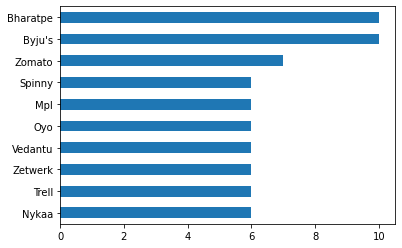

In [35]:
unique_companies.head(10).sort_values().plot.barh()

From here, we note that Bharatpe (10), Byju's (10) and Zomato (7) were the startups involved in most deals over the period. Let's take a closer look at them.

In [36]:
complete_set.loc[(complete_set["Company Name"] == "Bharatpe") | 
                 (complete_set["Company Name"] == "Byju's") | 
                 (complete_set["Company Name"] == "Zomato")]

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
443,Zomato,Food Delivery,Secondary Market,210000000,Gurgaon,Zomato is a search app offering detailed infor...,2018,nan,NaN,NaN
541,Byju's,Edtech,NaN,540000000,NaN,Provides online learning classes,2019,2011.0,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves..."
629,Zomato,Food Delivery,NaN,660000000,Gurgaon,Zomato is a food delivery and restaurant disco...,2020,2008,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management"
738,Byju's,EdTech,NaN,200000000,Bangalore,BYJU'S is an educational technology company th...,2020,2011,"Byju Raveendran, Divya Gokulnath","Owl Ventures, Tiger Global Management"
859,Zomato,FoodTech,NaN,52000000,Gurugram,Zomato is a food delivery and restaurant disco...,2020,2008,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management"
960,Zomato,Food devlivery,NaN,62000000,Haryana,Get online food delivery from restaurants near...,2020,2008,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford"
978,Zomato,Food devlivery,NaN,100000000,Haryana,Get online food delivery from restaurants near...,2020,2008,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford"
1104,Byju's,EdTech,NaN,122000000,Bangalore,Provides online learning classes,2020,2011,Byju Raveendran,DST Global
1228,Byju's,Edtech,NaN,0,Bangalore,Provides online learning classes,2020,2011,Byju Raveendran,BOND
1411,Zomato,Foodtech,NaN,5000000,Gurugram,Online food delivery and restaurant discovery ...,2020,nan,Deepinder Goyal,Pacific Horizon


We note from the above that the top 3 startups involved in most funding deals are located in 3 different locations and operate in 3 different sectors.

#### 3.8.2 Sector

In [37]:
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors

FinTech                             174
EdTech                              147
Financial Services                   86
Fintech                              85
Edtech                               74
                                   ... 
Startup laboratory                    1
Online credit management startup      1
Battery design                        1
Eyeglasses                            1
Staffing & Recruiting                 1
Name: Sector, Length: 595, dtype: int64

In [38]:
# Capitalizing only the first letters of each entry in the Sector column for normalization
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).capitalize())

# Equating similar entries in the Sector column for ease of analysis
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace(" and ", " & "))
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace("startup", ""))
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace("  ", " "))
complete_set.loc[complete_set["Sector"] == "nan", "Sector"] = "Sector TBD"
complete_set.loc[complete_set["Sector"] == "â€”", "Sector"] = "Sector TBD"

In [39]:
# Equating similar entries in the Sector column for ease of analysis (2)
complete_set.loc[complete_set["Sector"] == "Accomodation", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Accounting", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Ad-tech", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Advertisement", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Advertising", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Advisory firm", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Aeorspace", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Aero company", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Aerospace", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Agri tech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agriculture", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agritech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agritech/commerce", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Agtech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Ai & data science", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & debt", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & deep learning", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & media", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai & tech", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai chatbot", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai company", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai health", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai platform", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai robotics", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Ai", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Air transportation", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Alternative medicine", "Sector"] = "Medical"
complete_set.loc[complete_set["Sector"] == "Analytics", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Appliance", "Sector"] = "Appliances & Electronics"
complete_set.loc[complete_set["Sector"] == "Apps", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Ar platform", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Ar", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Ar/vr", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Artificial intelligence", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Audio", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Augmented reality", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Auto-tech", "Sector"] = "Automation tech"
complete_set.loc[complete_set["Sector"] == "Automation", "Sector"] = "Automation tech"
complete_set.loc[complete_set["Sector"] == "Automobile & technology", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automobile technology", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automobile", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automobiles", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive & rentals", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive and rentals", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive company", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive tech", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Automotive", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Autonomous vehicles", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Aviation", "Sector"] = "Aviation & aerospace"
complete_set.loc[complete_set["Sector"] == "Ayurveda tech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "B2b agritech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "B2b e-commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "B2b ecommerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "B2b manufacturing", "Sector"] = "Manufacturing"
complete_set.loc[complete_set["Sector"] == "B2b marketplace", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "B2b service", "Sector"] = "B2b"
complete_set.loc[complete_set["Sector"] == "B2b supply chain", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "B2b travel", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "B2b", "Sector"] = "B2b"
complete_set.loc[complete_set["Sector"] == "Banking", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Battery design", "Sector"] = "Battery"
complete_set.loc[complete_set["Sector"] == "Battery manufacturer", "Sector"] = "Battery"
complete_set.loc[complete_set["Sector"] == "Beauty & wellness", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Beauty products", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Beverage", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Beverage", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Beverages", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Big data", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Bike marketplace", "Sector"] = "Bike services"
complete_set.loc[complete_set["Sector"] == "Bike rental", "Sector"] = "Bike services"
complete_set.loc[complete_set["Sector"] == "Biopharma", "Sector"] = "Pharmaceutical"
complete_set.loc[complete_set["Sector"] == "Biotech", "Sector"] = "Biotechnology"
complete_set.loc[complete_set["Sector"] == "Biotechnology company", "Sector"] = "Biotechnology"
complete_set.loc[complete_set["Sector"] == "Biotechnology", "Sector"] = "Biotechnology"
complete_set.loc[complete_set["Sector"] == "Blockchain", "Sector"] = "Cryptocurrency"
complete_set.loc[complete_set["Sector"] == "Blogging", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Brand marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Broadcasting", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Business development", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Business intelligence", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Business travel", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Cannabis", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Capital markets", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Car service", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Car trade", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Catering", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Children", "Sector"] = "Child care"
complete_set.loc[complete_set["Sector"] == "Classifieds", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Clean energy", "Sector"] = "Clean energy"
complete_set.loc[complete_set["Sector"] == "Clean energy", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Cleantech", "Sector"] = "Clean energy"
complete_set.loc[complete_set["Sector"] == "Cleantech", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Clothing", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Cloud company", "Sector"] = "Cloud computing"
complete_set.loc[complete_set["Sector"] == "Cloud infrastructure", "Sector"] = "Cloud computing"
complete_set.loc[complete_set["Sector"] == "Commerce", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Commercial real estate", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Commercial", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Communities", "Sector"] = "Social media & communities"
complete_set.loc[complete_set["Sector"] == "Communities", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Community platform", "Sector"] = "Social media & communities"
complete_set.loc[complete_set["Sector"] == "Community platform", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Community", "Sector"] = "Social media & communities"
complete_set.loc[complete_set["Sector"] == "Community", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Computer games", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Computer software", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Construction tech", "Sector"] = "Construction"
complete_set.loc[complete_set["Sector"] == "Consultancy", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Consulting", "Sector"] = "Advisory & consultancy"
complete_set.loc[complete_set["Sector"] == "Consumer appliances", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer applications", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer electronics", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer goods", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer lending", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Consumer service", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer services", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer software", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Consumer software", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Consumer", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Content commerce", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content creation", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content management", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content marketplace", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content marktplace", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Content publishing", "Sector"] = "Content services"
complete_set.loc[complete_set["Sector"] == "Continuing education", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Conversational ai platform", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Cooking", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Cosmetics", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Coworking", "Sector"] = "Co-working"
complete_set.loc[complete_set["Sector"] == "Creative agency", "Sector"] = "Arts & crafts"
complete_set.loc[complete_set["Sector"] == "Credit cards", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Credit", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Crm", "Sector"] = "Customer service"
complete_set.loc[complete_set["Sector"] == "Crypto", "Sector"] = "Cryptocurrency"
complete_set.loc[complete_set["Sector"] == "Customer service company", "Sector"] = "Customer service"
complete_set.loc[complete_set["Sector"] == "Cybersecurity", "Sector"] = "Computer & network security"
complete_set.loc[complete_set["Sector"] == "D2c business", "Sector"] = "D2c"
complete_set.loc[complete_set["Sector"] == "D2c fashion", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "D2c jewellery", "Sector"] = "Jewellery"
complete_set.loc[complete_set["Sector"] == "Dairy", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Data analytics", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Data intelligence", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Data science", "Sector"] = "Data science & analytics"
complete_set.loc[complete_set["Sector"] == "Dating app", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Dating", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Deep tech ai", "Sector"] = "Deep Tech"
complete_set.loc[complete_set["Sector"] == "Deep tech", "Sector"] = "Deep Tech"
complete_set.loc[complete_set["Sector"] == "Deeptech", "Sector"] = "Deep Tech"
complete_set.loc[complete_set["Sector"] == "Defense & space", "Sector"] = "Defense"
complete_set.loc[complete_set["Sector"] == "Defense tech", "Sector"] = "Defense"
complete_set.loc[complete_set["Sector"] == "Deisgning", "Sector"] = "Design"
complete_set.loc[complete_set["Sector"] == "Delivery service", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Delivery", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Dental", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Design", "Sector"] = ""
complete_set.loc[complete_set["Sector"] == "Dietary supplements", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Digital entertainment", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Digital marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Digital media", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Digital mortgage", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "E store", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-commerce & ar", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-commerce platforms", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-learning", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "E-market", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-marketplace", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "E-mobility", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "E-sports", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "E-tail", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Ecommerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Edtech", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Edttech", "Sector"] = "Edtech"
complete_set.loc[complete_set["Sector"] == "Edttech", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Education management", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Electricity", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Electronics", "Sector"] = "Appliances & Electronics"
complete_set.loc[complete_set["Sector"] == "Emobility", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Energy", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Enterprise software", "Sector"] = "Enterprise resource planning (erp)"
complete_set.loc[complete_set["Sector"] == "Environmental consulting", "Sector"] = "Environmental services"
complete_set.loc[complete_set["Sector"] == "Environmental service", "Sector"] = "Environmental services"
complete_set.loc[complete_set["Sector"] == "Equity management", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Esports", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "Estore", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Ev", "Sector"] = "Electric vehicle"
complete_set.loc[complete_set["Sector"] == "Events", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Eye wear", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Eyeglasses", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Eyewear", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Facilities support service", "Sector"] = "Facilities services"
complete_set.loc[complete_set["Sector"] == "Fantasy sports", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "Farming", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Fashion & lifestyle", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Fashion tech", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Fashion", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Femtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Fertility tech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Finance company", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Finance", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Financial services", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Fintech", "Sector"] = "Fintech"
complete_set.loc[complete_set["Sector"] == "Fishery", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Fitness", "Sector"] = "Personal care"
complete_set.loc[complete_set["Sector"] == "Fmcg", "Sector"] = "Consumer goods & services"
complete_set.loc[complete_set["Sector"] == "Food & bevarages", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & beverage", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & beverages", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & logistics", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & nutrition", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & Nutrition", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food & tech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food delivery", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food devlivery", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food diet", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food industry", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food processing", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food production", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food tech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Food", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Foodtech & logistics", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Foodtech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Foootwear", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Funding platform", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Furniture rental", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Furniture", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Fusion beverages", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Gaming", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Healtcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health & fitness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health & wellness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health and fitness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health care", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health diagnostics", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health insurance", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Health", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Health, wellness & fitness", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Healthcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Healthcare/edtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Healthtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Heathcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Heathtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Helathcare", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Higher education", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Home decor", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Home design", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Home interior services", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Home services", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Hospital & health care", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Hospital", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Hospitality", "Sector"] = "Tourism & Hospitality"
complete_set.loc[complete_set["Sector"] == "Housing & rentals", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Housing marketplace", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Housing", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Hr tech", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Hr", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Hrtech", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Human resources", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Hygiene management", "Sector"] = "Hygiene"
complete_set.loc[complete_set["Sector"] == "Information technology & services", "Sector"] = "Information technology"
complete_set.loc[complete_set["Sector"] == "Insurance tech", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Insurance technology", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Insuretech", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Insurtech", "Sector"] = "Insurance"
complete_set.loc[complete_set["Sector"] == "Interior & decor", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Interior design", "Sector"] = "Furniture & Home Decor"
complete_set.loc[complete_set["Sector"] == "Internet of things", "Sector"] = "IoT"
complete_set.loc[complete_set["Sector"] == "Investment banking", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Investment management", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Investment tech", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Investment", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Iot platform", "Sector"] = "IoT"
complete_set.loc[complete_set["Sector"] == "Iot/automobile", "Sector"] = "IoT"
complete_set.loc[complete_set["Sector"] == "It company", "Sector"] = "It"
complete_set.loc[complete_set["Sector"] == "Job discovery platform", "Sector"] = "Job search"
complete_set.loc[complete_set["Sector"] == "Job portal", "Sector"] = "Job search"
complete_set.loc[complete_set["Sector"] == "Last mile transportation", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Legal services", "Sector"] = "Legal"
complete_set.loc[complete_set["Sector"] == "Legal tech", "Sector"] = "Legal"
complete_set.loc[complete_set["Sector"] == "Legaltech", "Sector"] = "Legal"
complete_set.loc[complete_set["Sector"] == "Logistics", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Logitech", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Luxury car", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Management consulting", "Sector"] = "Advisory"
complete_set.loc[complete_set["Sector"] == "Market research", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing & advertising", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing & customer loyalty", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing company", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Marketplace", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Martech", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Matrimony", "Sector"] = "Marriage"
complete_set.loc[complete_set["Sector"] == "Mechanical & industrial engineering", "Sector"] = "Engineering"
complete_set.loc[complete_set["Sector"] == "Mechanical or industrial engineering", "Sector"] = "Engineering"
complete_set.loc[complete_set["Sector"] == "Med tech", "Sector"] = "Medical"
complete_set.loc[complete_set["Sector"] == "Media & entertainment", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Media & networking", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Media and entertainment", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Media tech", "Sector"] = "Media"
complete_set.loc[complete_set["Sector"] == "Medical device", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Medtech", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Mental health", "Sector"] = "Medicine & healthcare"
complete_set.loc[complete_set["Sector"] == "Micro-mobiity", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Milk", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Mlops platform", "Sector"] = "Machine learning"
complete_set.loc[complete_set["Sector"] == "Mobile games", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Mobile games", "Sector"] = "Mobile"
complete_set.loc[complete_set["Sector"] == "Mobile payments", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Mobility tech", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Mobility", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Mobility/transport", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Music streaming", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Music", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Mutual funds", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Nano distribution network", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Neo-banking", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Networking platform", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Networking", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "News", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Nft marketplace", "Sector"] = "NFT"
complete_set.loc[complete_set["Sector"] == "Nft", "Sector"] = "NFT"
complete_set.loc[complete_set["Sector"] == "Nutrition sector", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Nutrition tech", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Nutrition", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Oil & energy", "Sector"] = "Energy"
complete_set.loc[complete_set["Sector"] == "Online credit management", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Online financial service", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Online games", "Sector"] = "Games"
complete_set.loc[complete_set["Sector"] == "Online media", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Online portals", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Packaging solution", "Sector"] = "Packaging services"
complete_set.loc[complete_set["Sector"] == "Pet care", "Sector"] = "Animal Care"
complete_set.loc[complete_set["Sector"] == "Pharma", "Sector"] = "Pharmaceutical"
complete_set.loc[complete_set["Sector"] == "Pharmacy", "Sector"] = "Pharmaceutical"
complete_set.loc[complete_set["Sector"] == "Podcast", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Pollution control equiptment", "Sector"] = "Hygiene"
complete_set.loc[complete_set["Sector"] == "Preschool daycare", "Sector"] = "Education"
complete_set.loc[complete_set["Sector"] == "Professional training & coaching", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Publication", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Real estate", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Real Estate", "Sector"] = "Housing & real estate"
complete_set.loc[complete_set["Sector"] == "Reatil", "Sector"] = "Retail"
complete_set.loc[complete_set["Sector"] == "Recruitment", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Renewable player", "Sector"] = "Renewable energy"
complete_set.loc[complete_set["Sector"] == "Renewables & environment", "Sector"] = "Renewable energy"
complete_set.loc[complete_set["Sector"] == "Rental space", "Sector"] = "Rentals"
complete_set.loc[complete_set["Sector"] == "Rental", "Sector"] = "Rentals"
complete_set.loc[complete_set["Sector"] == "Retail aggregator", "Sector"] = "Retail"
complete_set.loc[complete_set["Sector"] == "Retail tech", "Sector"] = "Retail"
complete_set.loc[complete_set["Sector"] == "Robotics & ai", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Robotics", "Sector"] = "Ai"
complete_set.loc[complete_set["Sector"] == "Saas platform", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == " Saas", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == "Saas/edtech", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == "SaasÂ Â startup", "Sector"] = "SAAS"
complete_set.loc[complete_set["Sector"] == "Sales & distribution", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sales & services", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sales and distribution", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sanitation solutions", "Sector"] = "Hygiene"
complete_set.loc[complete_set["Sector"] == "Skincare", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Skincare", "Sector"] = "Beauty"
complete_set.loc[complete_set["Sector"] == "Sles & marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Sles and marketing", "Sector"] = "Advertising, marketing & sales"
complete_set.loc[complete_set["Sector"] == "Social audio", "Sector"] = "Entertainment"
complete_set.loc[complete_set["Sector"] == "Social commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Social community", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social e-commerce", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Social media & communities", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social media", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social network", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Social platform", "Sector"] = "Social media & networking"
complete_set.loc[complete_set["Sector"] == "Software company", "Sector"] = "Software"
complete_set.loc[complete_set["Sector"] == "Soil-tech", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Solar monitoring company", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Solar saas", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Solar solution", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Solar", "Sector"] = "Solar energy"
complete_set.loc[complete_set["Sector"] == "Sportstech", "Sector"] = "Sports"
complete_set.loc[complete_set["Sector"] == "Staffing & recruiting", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Supply chain platform", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Supply chain, agritech", "Sector"] = "Logistics & supply chain"
complete_set.loc[complete_set["Sector"] == "Taxation", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Tech company", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Tech hub", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Tech platform", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Technology", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Techonology", "Sector"] = "Tech"
complete_set.loc[complete_set["Sector"] == "Telecommuncation", "Sector"] = "Telecommunication"
complete_set.loc[complete_set["Sector"] == "Telecommunications", "Sector"] = "Telecommunication"
complete_set.loc[complete_set["Sector"] == "Textiles", "Sector"] = "Apparel & fashion"
complete_set.loc[complete_set["Sector"] == "Tobacco", "Sector"] = "Agriculture & agritech"
complete_set.loc[complete_set["Sector"] == "Tourism & ev", "Sector"] = "Tourism & Hospitality"
complete_set.loc[complete_set["Sector"] == "Tourism", "Sector"] = "Tourism & Hospitality"
complete_set.loc[complete_set["Sector"] == "Trading platform", "Sector"] = "E-commerce"
complete_set.loc[complete_set["Sector"] == "Training", "Sector"] = "Human Resources"
complete_set.loc[complete_set["Sector"] == "Transport & rentals", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Transport automation", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Transport", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Transportation", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Travel & saas", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Travel tech", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Travel", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Traveltech", "Sector"] = "Travel & Transport"
complete_set.loc[complete_set["Sector"] == "Vehicle repair", "Sector"] = "Automobiles & automotives"
complete_set.loc[complete_set["Sector"] == "Venture capital & private equity", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Venture capital", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Venture capitalist", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Veterinary", "Sector"] = "Animal Care"
complete_set.loc[complete_set["Sector"] == "Video personalization", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video platform", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video sharing platform", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video streaming platform", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Video", "Sector"] = "Video communication"
complete_set.loc[complete_set["Sector"] == "Virtual auditing", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Virtual banking", "Sector"] = "Financial Services"
complete_set.loc[complete_set["Sector"] == "Visual media", "Sector"] = "Information services"
complete_set.loc[complete_set["Sector"] == "Vr & saas", "Sector"] = "Ar/vr"
complete_set.loc[complete_set["Sector"] == "Wealth management", "Sector"] = "Financial services"
complete_set.loc[complete_set["Sector"] == "Wedding", "Sector"] = "Marriage"
complete_set.loc[complete_set["Sector"] == "Wellness", "Sector"] = "Personal care"
complete_set.loc[complete_set["Sector"] == "Wine & spirits", "Sector"] = "Food & Nutrition"
complete_set.loc[complete_set["Sector"] == "Yoga & wellness", "Sector"] = "Personal care"

In [40]:
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

Education                    278
Fintech                      259
Medicine & healthcare        227
E-commerce                   158
Financial services           144
Food & Nutrition             137
Agriculture & agritech        85
Automobiles & automotives     81
Logistics & supply chain      70
Consumer goods & services     62
Name: Sector, dtype: int64

Text(0.5, 1.0, 'Funding Deals per Sector')

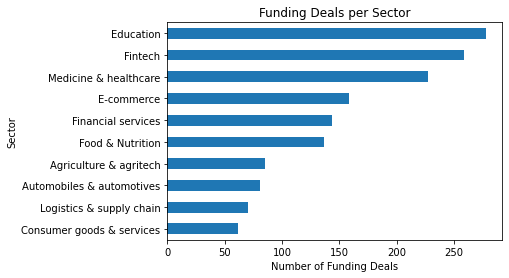

In [41]:
unique_sectors.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("Sector")
plt.title("Funding Deals per Sector")

Here, we note that startups in the education (279), fintech (258), and medicine & healthcare (227) sectors were involved in most transactions over the period, with financial services (166) and e-commerce (158) following in distance. The top 10 (out of 202) sectors, by number of deals, make up about 53% of the total deals over the period. It will therefore be fair to conclude that funding is centralized around a few sectors.

#### 3.8.3 Funding Stage

In [42]:
unique_stages = (complete_set.loc[:,"Funding Stage"]).value_counts()
unique_stages.head(15)

Seed                        604
Series A                    305
Pre-series A                209
Series B                    134
Series C                    114
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     51
Debt                         45
Angel                        38
Venture - Series Unknown     37
Series E                     29
Pre-series B                 14
Debt Financing               13
Name: Funding Stage, dtype: int64

From the preview of the unique stages above, we see that a number of stages implying the same stage are grouped differently due to differences in capitalization, spacing and use of hyphens. They should therefore be standardized to ensure that analyses based on the column presents a truer representation.

In [43]:
# Equating similar entries in the funding stage column for ease of analysis
complete_set["Funding Stage"] = complete_set["Funding Stage"].apply(lambda x: str(x).replace(" Round",""))
complete_set["Funding Stage"] = complete_set["Funding Stage"].apply(lambda x: str(x).replace(" round",""))
complete_set["Funding Stage"] = complete_set["Funding Stage"].apply(lambda x: str(x).replace(" - Series Unknown",""))

In [44]:
# Equating similar entries in the Sector column for ease of analysis (2)
complete_set.loc[complete_set["Funding Stage"] == "$6000000", "Funding Stage"] = "Venture"
complete_set.loc[complete_set["Funding Stage"] == "Debt Financing", "Funding Stage"] = "Debt"
complete_set.loc[complete_set["Funding Stage"] == "Early seed", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Fresh Funding", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Fresh funding", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "nan", "Funding Stage"] = "Undisclosed"
complete_set.loc[complete_set["Funding Stage"] == "PE", "Funding Stage"] = "Private Equity"
complete_set.loc[complete_set["Funding Stage"] == "Pre seed", "Funding Stage"] = "Pre-seed"
complete_set.loc[complete_set["Funding Stage"] == "Pre series A1", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Pre- series A", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Pre-Series A", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Pre-Series A1", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Seed fund", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Seed funding", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Seed Funding", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Seies A", "Funding Stage"] = "Series A"
complete_set.loc[complete_set["Funding Stage"] == "Series A2", "Funding Stage"] = "Series A"
complete_set.loc[complete_set["Funding Stage"] == "Series I", "Funding Stage"] = "Series A"
complete_set.loc[complete_set["Funding Stage"] == "Pre Series A", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Pre series A", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Pre series B", "Funding Stage"] = "Pre-series B"
complete_set.loc[complete_set["Funding Stage"] == "Pre series C", "Funding Stage"] = "Pre-series C"
complete_set.loc[complete_set["Funding Stage"] == "Pre-Seed", "Funding Stage"] = "Pre-seed"
complete_set.loc[complete_set["Funding Stage"] == "Pre-series A1", "Funding Stage"] = "Pre-series A"
complete_set.loc[complete_set["Funding Stage"] == "Seed & Series A", "Funding Stage"] = "Series A" # Checked Crunchbase
complete_set.loc[complete_set["Funding Stage"] == "Seed A", "Funding Stage"] = "Series A"
complete_set.loc[complete_set["Funding Stage"] == "Seed Investment", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Seed+", "Funding Stage"] = "Seed"
complete_set.loc[complete_set["Funding Stage"] == "Pre-Series B", "Funding Stage"] = "Pre-series B"

In [45]:
# Taking a final preview of the revised column data
unique_stages.head(15)

Seed                        604
Series A                    305
Pre-series A                209
Series B                    134
Series C                    114
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     51
Debt                         45
Angel                        38
Venture - Series Unknown     37
Series E                     29
Pre-series B                 14
Debt Financing               13
Name: Funding Stage, dtype: int64

Text(0.5, 1.0, 'Funding Deals per Funding Stage')

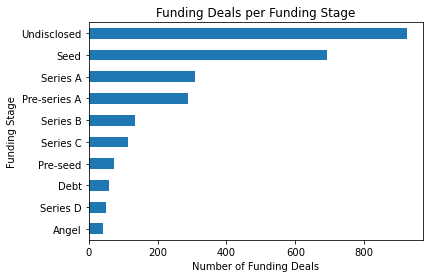

In [46]:
unique_stages = (complete_set.loc[:,"Funding Stage"]).value_counts()
unique_stages.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("Funding Stage")
plt.title("Funding Deals per Funding Stage")

We note from the plot above that most of the funding stages for deals over the period were undisclosed. For the disclosed stages, "Seed" round had the most deals by a mile (924) followed by "Series A" (310) and "Pre-Series A" (289), with "Series B" and "Series C" following in the distance with 134 and 114 deals respectively.

#### 3.8.4 Amounts

In [47]:
unique_amounts = (complete_set.loc[:,"Amount"]).value_counts()
unique_amounts

0            548
1000000      169
2000000      116
3000000       81
5000000       81
            ... 
1065000        1
11635000       1
122000000      1
110000         1
6200000        1
Name: Amount, Length: 512, dtype: int64

In [48]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [49]:
# Replacing all Nulls with 0
complete_set.loc[complete_set["Amount"] == "nan", "Amount"] = np.nan
complete_set["Amount"].fillna(0.00,inplace = True)

# Creating a copy of the DataFrame sorted by Amount
amt_sorting = (complete_set.loc[complete_set["Amount"] != 0]).round(2).sort_values(by = "Amount")
amt_sorting

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
1162,Satya microcapital,Fintech,Undisclosed,9.00,Delhi,Microfinance company that offers collateral-fr...,2020,1995,Vivek Tiwari,BlueOrchard Finance Limited
1444,Peel works,Saas,"Series C, D",42.00,Mumbai,E-commerce for corner/retail stores.,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures
70,Ultraviolette automotive,Automobiles & automotives,Series A,876.00,Bangalore,Ultraviolette is a startup working on electric...,2018,nan,NaN,NaN
98,Next digital solutions,"Advertising, marketing & sales",Angel,1460.00,Kota,Next Digital Solutions is website design & Dig...,2018,nan,NaN,NaN
164,Classworks india,Education,Undisclosed,1460.00,Chennai,"Saas, Web App, Mobile App, School Education",2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101,Swiggy,Food & Nutrition,Series H,1000000000.00,Bangalore,Swiggy is a food ordering and delivery company...,2018,nan,NaN,NaN
940,Reliance,Multinational conglomerate company,Undisclosed,2200000000.00,Mumbai,Reliance owns businesses across India engaged ...,2020,1973,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake"
929,Snowflake,Tech,Undisclosed,3000000000.00,California,Snowflake is a cloud data platform that provid...,2020,2012,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group"
892,Reliance retail ventures ltd,Retail,Undisclosed,70000000000.00,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company"


In [50]:
# Creating a function to find outliers using IQR
def outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = outliers_IQR(complete_set["Amount"])
print("Number of outliers: " + str(len(outliers)), "\n")
print("Outliers percentage of total: " + str((((len(outliers))/len(complete_set["Amount"])*100))) + "%", "\n")
print("Max outlier value: " + str(outliers.max()), "\n")
print("Min outlier value: " + str(outliers.min()), "\n")

Number of outliers: 470 

Outliers percentage of total: 16.46234676007005% 

Max outlier value: 150000000000.0 

Min outlier value: 20000000.0 



Since the outliers represent over 16% of the data available, it would be unwise to remove all of them. Outliers from the top and bottom will be selected for confirmation online, then further action taken on them.

In [51]:
# Who could be the outliers?
## Looking at the outliers from the top
(amt_sorting.loc[amt_sorting["Amount"] > 0]).head(10)

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
1162,Satya microcapital,Fintech,Undisclosed,9.00,Delhi,Microfinance company that offers collateral-fr...,2020,1995,Vivek Tiwari,BlueOrchard Finance Limited
1444,Peel works,Saas,"Series C, D",42.00,Mumbai,E-commerce for corner/retail stores.,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures
70,Ultraviolette automotive,Automobiles & automotives,Series A,876.00,Bangalore,Ultraviolette is a startup working on electric...,2018,nan,NaN,NaN
98,Next digital solutions,"Advertising, marketing & sales",Angel,1460.00,Kota,Next Digital Solutions is website design & Dig...,2018,nan,NaN,NaN
164,Classworks india,Education,Undisclosed,1460.00,Chennai,"Saas, Web App, Mobile App, School Education",2018,nan,NaN,NaN
258,Enlyft digital solutions private limited,—,Seed,2920.00,Pune,Digital Marketing Agency,2018,nan,NaN,NaN
19,Antariksh waste ventures pvt ltd,IoT,Seed,7300.00,Chennai,Waste Management for Smart Cities,2018,nan,NaN,NaN
522,Mombay,Food & Nutrition,Seed,7500.00,Mumbai,Mombay is a unique opportunity for housewives ...,2018,nan,NaN,NaN
95,Authmetrik,B2b,Grant,10000.00,Gurgaon,"SaaS, B2B, Security, Stop account sharing, Fra...",2018,nan,NaN,NaN
1954,Glii,Social media & networking,Seed,10000.00,Noida,India’s finest dating companionship application,2021,2020.0,Shivam Kaushik,We Founder Circle


In [52]:
# Correcting the erroneous entries
## SATYA Microcapital (raised ₹725M debt financing from BlueOrchard in 2020 to be converted at 74.1322 INR/USD)
complete_set.loc[(complete_set["Company Name"] == "Satya microcapital") & 
                 (complete_set["Amount"] == 9.00), 
                 ["Funding Stage", "Amount", "Investors"]] = ["Debt", int(725000000/74.1322), "BlueOrchard Finance S A"]

## Ultraviolette Automotive: raised ₹60M Series A funding in 2018 
complete_set.loc[(complete_set["Company Name"] == "Ultraviolette automotive") &
                 (complete_set["Amount"] == 876.00), 
                 ["Funding Stage", "Amount"]] = ["Series A", int(60000000*0.0146)]

## Peel Works received lots of funding in 2020 not available in the dataset, I will therefore add them:
peel_addon = pd.DataFrame({'Company Name': ["Peel works","Peel works","Peel works","Peel works"], 
              'Sector': ["Saas", "Saas", "Saas"," Saas"], 
              'Funding Stage': ["Series D","Series D","Debt","Debt"],
              'Amount': [2840000, 2000000, 1000000, 408000], 
              'Headquarters': ["Mumbai","Mumbai","Mumbai","Mumbai"],
              'Description': [np.nan, np.nan, np.nan, np.nan], 
              'Funding Year': ["2020", "2020", "2020", "2020"],
              'Year Founded': ["2010", "2010", "2010", "2010"], 
              'Founders': ["Sachin Chhabra, Nidhi Ramachandran","Sachin Chhabra, Nidhi Ramachandran","Sachin Chhabra, Nidhi Ramachandran","Sachin Chhabra, Nidhi Ramachandran"],
              'Investors': ["CESC", np.nan, "BlackSoil", "Equanimity Investments"]})

# Dropping the erroneous column and inserting the corrections
complete_set = complete_set.drop([1444], axis = 0) 
complete_set = pd.concat([complete_set,peel_addon], ignore_index=True, axis = 0)

complete_set.loc[(complete_set["Company Name"] == "Peel works")]

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
2854,Peel works,Saas,Series D,2840000.00,Mumbai,NaN,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",CESC
2855,Peel works,Saas,Series D,2000000.00,Mumbai,NaN,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",NaN
2856,Peel works,Saas,Debt,1000000.00,Mumbai,NaN,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",BlackSoil
2857,Peel works,Saas,Debt,408000.00,Mumbai,NaN,2020,2010,"Sachin Chhabra, Nidhi Ramachandran",Equanimity Investments


In [53]:
## Looking at the outliers from the bottom
(amt_sorting.loc[amt_sorting["Amount"] > 0]).tail(10)

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
90,Sbi life,Insurance,Private Equity,742000000.00,Mumbai,SBI Life is one of the life insurance company ...,2018,nan,NaN,NaN
1718,Swiggy,Food & Nutrition,Undisclosed,800000000.00,Bangalore,Swiggy is an on-demand food delivery platform ...,2021,2014.0,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital"
914,Reliance retail ventures,E-commerce,Undisclosed,800000000.00,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006,Mukesh Ambani,"General Atlantic, Kohlberg Kravis Roberts"
2581,Dream sports,Sports,Undisclosed,840000000.00,Mumbai,Dream Sports is India’s leading sports technol...,2021,2008.0,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C..."
1992,Verse innovation,Innovation management,Series H,1000000000.00,Bangalore,Owner of Dailyhunt App and I-Pay,2021,2007.0,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par..."
101,Swiggy,Food & Nutrition,Series H,1000000000.00,Bangalore,Swiggy is a food ordering and delivery company...,2018,nan,NaN,NaN
940,Reliance,Multinational conglomerate company,Undisclosed,2200000000.00,Mumbai,Reliance owns businesses across India engaged ...,2020,1973,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake"
929,Snowflake,Tech,Undisclosed,3000000000.00,California,Snowflake is a cloud data platform that provid...,2020,2012,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group"
892,Reliance retail ventures ltd,Retail,Undisclosed,70000000000.00,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company"
1738,Alteria capital,Fintech,Debt,150000000000.00,Mumbai,Alteria Capital is a Venture debt firm .,2021,2018.0,Vinod Murali,NaN


Text(0.5, 1.0, 'Distribution of Funding Amounts')

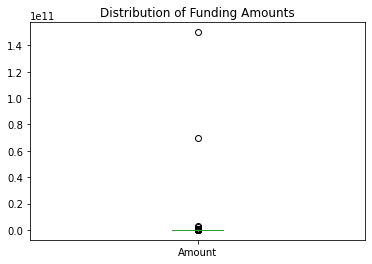

In [54]:
# Boxplot to summarize the amounts
(amt_sorting.loc[amt_sorting["Amount"] > 0]).plot.box()
(amt_sorting.loc[amt_sorting["Amount"] > 0]).describe()
plt.title("Distribution of Funding Amounts")

In [55]:
complete_set.loc[(complete_set["Amount"] == 70000000000.00) |
                (complete_set["Amount"] == 150000000000.00)]

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
892,Reliance retail ventures ltd,Retail,Undisclosed,70000000000.00,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company"
1737,Alteria capital,Fintech,Debt,150000000000.00,Mumbai,Alteria Capital is a Venture debt firm .,2021,2018.0,Vinod Murali,NaN


Despite being correct entries, the top 2 outliers Alteria Capital (index 1737) and Reliance Retail Ventures Ltd (index 892) will be dropped to assess their impact on the amounts.

In [56]:
complete_set_no_outliers = complete_set.drop([892, 1737], axis = 0)

,Amount
count,2308.00
mean,25900134.96
std,107456008.88
min,1460.00
25%,1000000.00
50%,3000000.00
75%,12000000.00
max,3000000000.00


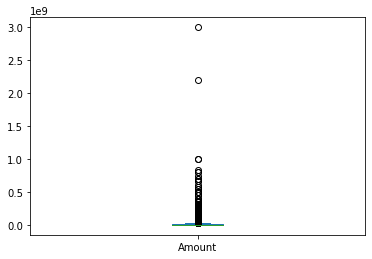

In [57]:
# Re-assigning the sorted DataFrame and displaying the revised DataFrame in a boxplot
amt_sorting = (complete_set_no_outliers.loc[complete_set_no_outliers["Amount"] > 0]).round(2).sort_values(by = "Amount")
(amt_sorting.loc[amt_sorting["Amount"] > 0]).plot.box()
(amt_sorting.loc[amt_sorting["Amount"] > 0]).describe()

Per the boxplots for the complete set with the two major outliers and that without the two major outliers, their effects on the mean is evident, at USD 121.27m with outliers and USD 25.90m without outliers. This represents a stark USD 95.37m difference between the two datasets. Even so, it is visible from the boxplot for the complete set without outliers that there are two more big outliers dragging the USD 25.90m mean outward, with the next looking relatively close to the norm.

As such, the **median** of **USD 3m** (in both cases - with and without outliers) will be used for computations and analysis for the "average" startup. That is to say that the average funding deal over the period was worth **USD 3m**.

#### 3.8.5 Locations

In [58]:
unique_locations = (complete_set.loc[:,"Headquarters"]).value_counts()
unique_locations

Bangalore      859
Mumbai         471
Gurugram       237
New Delhi      230
Chennai        106
              ... 
France           1
Palmwoods        1
Milano           1
Bangaldesh       1
Gandhinagar      1
Name: Headquarters, Length: 134, dtype: int64

In [59]:
complete_set["Headquarters"].apply(str)
complete_set["Headquarters"].fillna("Unknown Location", inplace = True)
complete_set.loc[complete_set["Headquarters"] == "nan", "Headquarters"] = "Unknown"
complete_set.loc[complete_set["Headquarters"] == "Bengaluru", "Headquarters"] = "Bangalore"
complete_set.loc[complete_set["Headquarters"] == "Bombay", "Headquarters"] = "Mumbai"
complete_set.loc[complete_set["Headquarters"] == "Gurugram", "Headquarters"] = "Gurgaon"
complete_set.loc[complete_set["Headquarters"] == "Mountain View, CA", "Headquarters"] = "California"

unique_locations = (complete_set.loc[:,"Headquarters"]).value_counts()
unique_locations.head(10)

Bangalore    916
Mumbai       471
Gurgaon      317
New Delhi    230
Chennai      106
Pune         104
Unknown       94
Delhi         88
Noida         86
Hyderabad     76
Name: Headquarters, dtype: int64

Text(0.5, 1.0, 'Funding Deals per City')

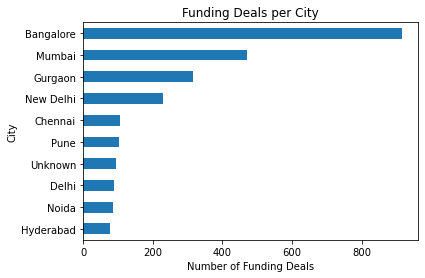

In [60]:
unique_locations.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("City")
plt.title("Funding Deals per City")

From the above, it is seen that Bangalore (916) leads the pack (as the city with most startups involved in deals) by almost twice as much as the next location, Mumbai, which has 471. It also leaves a fair distance between itself and Gurgaon (317), New Delhi (230), Chennai (106), and Pune (104) in that order.

These make up about 75% of the total transactions over the period, thus pointing to part acceptance of the null hypothesis which posits that funding to startups is centralized around specific locations and sectors.

#### 3.8.6 Description

In [61]:
complete_set["Description"].apply(str) # Applying a string formatting to the column
complete_set["Description"].fillna("Unknown", inplace = True) # Filling null spaces with Unknown
complete_set["Description"].replace("  "," ", inplace = True) # Replacing all double spaces
company_descs = (complete_set.loc[:,"Description"]).value_counts()
company_descs

BYJU'S is an educational technology company that develops personalized learning programs for K-12 students.    5
Provides online learning classes                                                                               5
Onine learning platform                                                                                        4
Mobile Premier League is a skill-based eSports platform used to offer cash prizes while playing games.         4
BharatPe develops a QR code-based payment app for offline retailers and businesses.                            4
                                                                                                              ..
Known for its larger brands – Faasos, Behrouz Biryani, Oven story and Mandarin                                 1
Cosmetics & beauty products online                                                                             1
Crowdfunding, Charity, E-commerce                                                               

#### 3.8.7 Funding Year

In [62]:
complete_set["Funding Year"].apply(str) # Applying string formatting
complete_set["Funding Year"].fillna(np.nan, inplace = True) # Filling unknown spaces with null
funding_year = (complete_set.loc[:,"Funding Year"]).value_counts()
funding_year = funding_year.sort_index()
funding_year

2018     525
2019      89
2020    1054
2021    1190
Name: Funding Year, dtype: int64

Text(0.5, 0, 'Number of Deals')

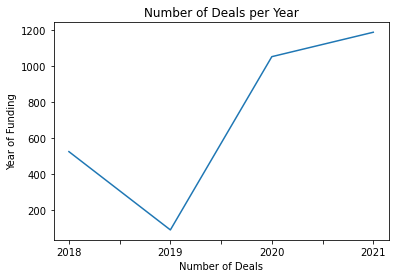

In [63]:
funding_year.plot()
plt.title("Number of Deals per Year")
plt.ylabel("Year of Funding")
plt.xlabel("Number of Deals")

Here, we note that the number of funding deals, despite the big drop in 2019, is increasing. Number of funding deals increased from 525 in 2018 to 1190 in 2021. This implies that chances are fairly high that a new startup would be able to land a funding deal going forward since the number of deals is on an increasing trajectory.

What about the amounts? How have the total amounts invested changed over the period?

In [64]:
# Let's look at how much the average startup raised based on their founding year
funding_set = complete_set.groupby("Funding Year").Amount.agg(["count","sum", "mean", "median"])
funding_set

,count,sum,mean,median
Funding Year,,,,
2018,525,6642398301.00,12652187.24,584000.00
2019,89,3336433200.00,37488013.48,5500000.00
2020,1054,90187104429.00,85566512.74,1440000.00
2021,1190,179611575552.00,150934097.10,2500000.00


Text(0.5, 0, 'Year of Funding')

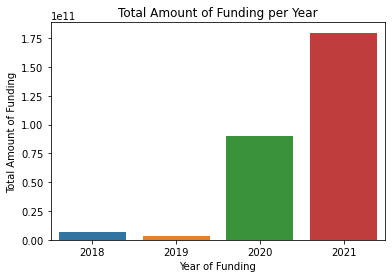

In [65]:
sns.barplot(x = funding_set.index, y = funding_set["sum"])
plt.title("Total Amount of Funding per Year")
plt.ylabel("Total Amount of Funding")
plt.xlabel("Year of Funding")

We note that in line with the increasing number of deals over the period, total amounts invested have been increasing over the period, with investments in 2021 having the highest monetary value.

We must not ignore the fact that despite 2018 having a higher number of transactions, the average amount per deal (USD 12.7bn) was significantly less than that of 2019 (USD 37.5bn)

#### 3.8.8 Year Founded

In [66]:
((complete_set.loc[:,"Year Founded"]).value_counts())[1:]

2020.0    231
2019.0    180
2018.0    148
2015.0    140
2015      135
2016.0    125
2018      123
2017.0    117
2019      104
2016      103
2017       92
2014       71
2021.0     70
2014.0     64
2020       42
2012       39
2011.0     37
2013       36
2012.0     33
2011       30
2013.0     28
2010       19
2010.0     18
2008       18
2008.0     16
2009.0      7
2009        7
2007.0      6
2000.0      6
2006        6
2007        4
2004.0      3
2006.0      3
1994.0      2
1998.0      2
1995        2
1999.0      2
1989.0      2
2002.0      2
1999        1
2005.0      1
1984.0      1
1991.0      1
2003.0      1
1978.0      1
1998        1
1978        1
1994        1
1993.0      1
1982        1
2001        1
2004        1
2002        1
-           1
1973        1
2005        1
1963.0      1
Name: Year Founded, dtype: int64

In [67]:
# Making final touches to the column for further analysis
complete_set["Year Founded"].apply(str) # Applying string formatting
complete_set["Year Founded"].replace("-","nan", inplace = True) # Replacing dashes with nan
complete_set["Year Founded"] = complete_set["Year Founded"].apply(lambda x: str(x).replace(".0","")) # Removing .0 attached
year_founded = ((complete_set.loc[:,"Year Founded"]).value_counts())[1:] # Excluding the rows with "nan"
year_founded = year_founded.sort_index() # Showing trend of startups founded since 2000
year_founded

1963      1
1973      1
1978      2
1982      1
1984      1
1989      2
1991      1
1993      1
1994      3
1995      2
1998      3
1999      3
2000      6
2001      1
2002      3
2003      1
2004      4
2005      2
2006      9
2007     10
2008     34
2009     14
2010     37
2011     67
2012     72
2013     64
2014    135
2015    275
2016    228
2017    209
2018    271
2019    284
2020    273
2021     70
Name: Year Founded, dtype: int64

In [68]:
# Taking a look at which "startups" were founded earlier than 2000
complete_set.loc[(complete_set["Year Founded"] == "1963") |
                (complete_set["Year Founded"] == "1973") |
                (complete_set["Year Founded"] == "1978") |
                (complete_set["Year Founded"] == "1982") |
                (complete_set["Year Founded"] == "1984") |
                (complete_set["Year Founded"] == "1989") |
                (complete_set["Year Founded"] == "1991") |
                (complete_set["Year Founded"] == "1993") |
                (complete_set["Year Founded"] == "1994") |
                (complete_set["Year Founded"] == "1995") |
                (complete_set["Year Founded"] == "1998") |
                (complete_set["Year Founded"] == "1999")].sort_values(by = "Year Founded")

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
2646,Duroflex,Furniture & Home Decor,Undisclosed,60000000.00,Bangalore,"5 decades of experience, superior quality and ...",2021,1963,P. C. Mathew,Norwest Venture Partners
940,Reliance,Multinational conglomerate company,Undisclosed,2200000000.00,Mumbai,Reliance owns businesses across India engaged ...,2020,1973,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake"
765,Biocon,Medicine & healthcare,Undisclosed,15000000.00,Bangalore,"Biocon is a healthcare and technology, company...",2020,1978,Kiran Mazumdar-Shaw,Goldman Sachs
2101,Biocon biologics,Biotechnology,Undisclosed,70000000.00,Bangalore,Biocon is a fully integrated pure play biosimi...,2021,1978,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital"
644,Arya,Agriculture & agritech,Series B,21000000.00,Noida,"""Simplifying Agribusiness"" Throughout Agri-Sup...",2020,1982,"Chattanathan Devarajan, Prasanna Rao, Anand Ch...",Quona Capital
2379,Five star finance,Fintech,Undisclosed,234000000.00,Chennai,Five-Star is a Registered Non Banking Finance ...,2021,1984,V K Ranganathan,"TPG Capital Asia, Epiq Capital"
1725,Wess,Renewable energy,Seed,2000000.00,Mumbai,Waaree is India's Largest Solar Module Manufac...,2021,1989,Hitesh Doshi,Centrum Financial Services
2645,Vlcc health care,Medicine & healthcare,Undisclosed,4000000.00,Gurgaon,VLCC is today widely recognized for its compre...,2021,1989,Vandana Luthra,NaN
2368,Safex chemicals,Agriculture & agritech,Undisclosed,50000000.00,New Delhi,Safex Chemicals India Ltd is a leading company...,2021,1991,"SK Jindal, SK Chaudhary",BanyanTree Finance Pvt. Ltd.
1679,Tessolve,Appliances & Electronics,Undisclosed,40000000.00,Bangalore,Tessolve Semiconductor offers engineering in s...,2021,1993,"P Raja Manickam, Srinivas Chinamilli, Veerappan V",Novo Tellus Capital


In [69]:
# After crosschecking the internet for the founding years of the startups, some mistakes in the data were noted and will be corrected accordingly:
## Arya was founded in 2013
complete_set.loc[complete_set["Company Name"] == "Arya", "Year Founded"] = "2013"

# CreditWise Capital was founded in 2018
complete_set.loc[complete_set["Company Name"] == "Credit wise capital", "Year Founded"] = "2018"

# Lendingkart was founded in 2014
complete_set.loc[complete_set["Company Name"] == "Lendingkart", "Year Founded"] = "2014"

# Nobel hygiene was founded in 2001
complete_set.loc[complete_set["Company Name"] == "Nobel hygiene", "Year Founded"] = "2001"

Text(0.5, 0, 'Number of Transactions')

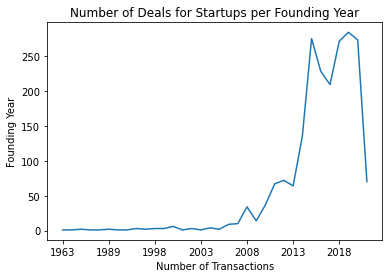

In [70]:
year_founded.plot()
plt.title("Number of Deals for Startups per Founding Year")
plt.ylabel("Founding Year")
plt.xlabel("Number of Transactions")

Here, we note that generally, newer startups are involved in more funding deals, with an overall increase from startups founded in 2000. 2021's low value may imply lower chances of landing a funding deal in the same year which a startup was founded. As such, it is fair to say that other sources of finance may be used in the first year of founding before actively seeking a funding deal down the line.

In [71]:
# Let's look at how much the average startup raised based on their founding year
year_set = complete_set.groupby("Year Founded").Amount.agg(["count","sum", "mean", "median"])
year_set

,count,sum,mean,median
Year Founded,,,,
1963,1,60000000.00,60000000.00,60000000.00
1973,1,2200000000.00,2200000000.00,2200000000.00
1978,2,85000000.00,42500000.00,42500000.00
1984,1,234000000.00,234000000.00,234000000.00
1989,2,6000000.00,3000000.00,3000000.00
1991,1,50000000.00,50000000.00,50000000.00
1993,1,40000000.00,40000000.00,40000000.00
1994,2,56000000.00,28000000.00,28000000.00
1995,2,59779825.00,29889912.50,29889912.50


Text(0.5, 1.0, 'Total Funding Raised by Startups based on Founding Year')

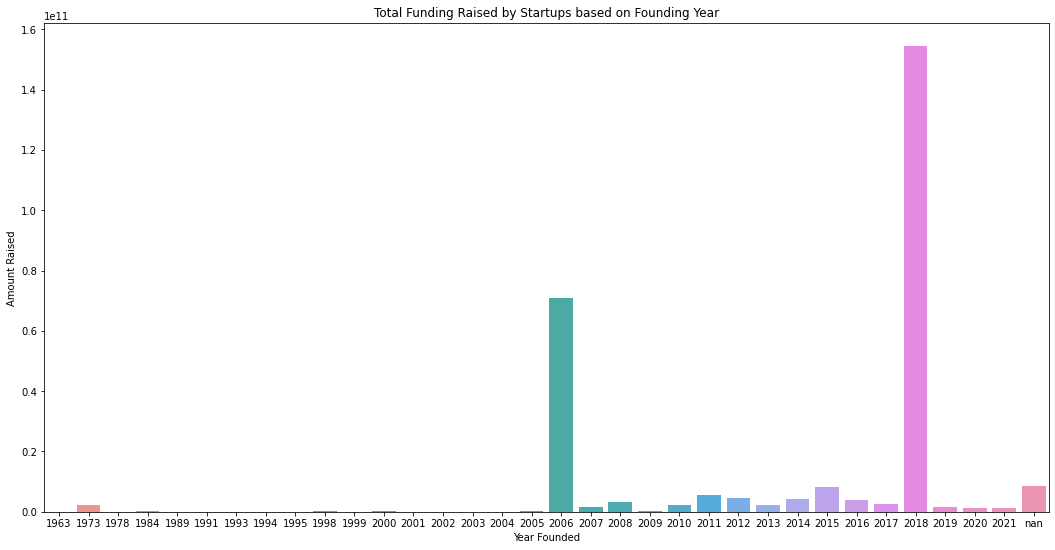

In [72]:
plt.figure(figsize = (18,9))
sns.barplot(x = year_set.index, y = year_set["sum"])
plt.xlabel("Year Founded")
plt.ylabel("Amount Raised")
plt.title("Total Funding Raised by Startups based on Founding Year")

Here again, we note that startups founded in 2018 raised the most funds over the period, followed by 2006 and then other startups founded after 2009. This further reinforces the earlier observation that startups may have to find alternative sources of during the early stages, and look out for funding opportunities with time and growth.

#### 3.8.9 Founders

In [73]:
complete_set["Founders"].apply(str) # Casting the column to string
complete_set["Founders"] = complete_set["Founders"].str.split(',').str[0] # Selecting the first name as the primary founder
complete_set["Founders"].fillna("Unknown Founder", inplace = True) # Filling nulls with "Unknown Founder"
complete_set["Founders"].replace("  "," ", inplace = True) # Removing any double spaces
founders = (complete_set.loc[:,"Founders"]).value_counts()
founders.head(10)

Unknown Founder         544
Byju Raveendran          12
Ashneer Grover           10
Saurabh Saxena            7
Bhavish Aggarwal          6
Deepinder Goyal           6
Gaurav Munjal             6
Sai Srinivas Kiran G      5
Falguni Nayar             5
Darpan Sanghvi            5
Name: Founders, dtype: int64

Text(0.5, 1.0, 'Number of Known Fundings per Founder')

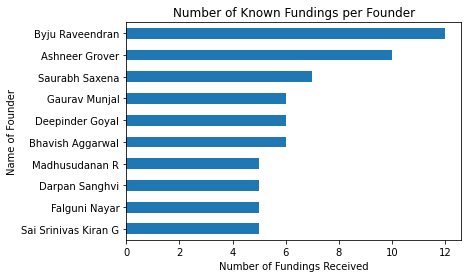

In [74]:
founders[1:].head(10).sort_values().plot.barh() # Plotting while excluding the "Unknown Founders"
plt.xlabel("Number of Fundings Received")
plt.ylabel("Name of Founder")
plt.title("Number of Known Fundings per Founder")

In [75]:
# Taking a look at which "startups" were founded earlier than 2000
complete_set.loc[(complete_set["Founders"].str.split(',').str[0] == "Byju Raveendran") |
                (complete_set["Founders"].str.split(',').str[0] == "Ashneer Grover") |
                (complete_set["Founders"].str.split(',').str[0] == "Saurabh Saxena") |
                (complete_set["Founders"].str.split(',').str[0] == "Gaurav Munjal") |
                 (complete_set["Founders"].str.split(',').str[0] == "Deepinder Goyal") |
                (complete_set["Founders"].str.split(',').str[0] == "bhavish Aggarwal")]

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
541,Byju's,Education,Undisclosed,540000000.00,Unknown Location,Provides online learning classes,2019,2011,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves..."
629,Zomato,Food & Nutrition,Undisclosed,660000000.00,Gurgaon,Zomato is a food delivery and restaurant disco...,2020,2008,Deepinder Goyal,"Kora, Tiger Global Management"
730,Unacademy,Education,Undisclosed,0.00,Bangalore,Unacademy is an online learning platform provi...,2020,2015,Gaurav Munjal,"Dragoneer Investment Group, Tiger Global Manag..."
738,Byju's,Education,Undisclosed,200000000.00,Bangalore,BYJU'S is an educational technology company th...,2020,2011,Byju Raveendran,"Owl Ventures, Tiger Global Management"
859,Zomato,Food & Nutrition,Undisclosed,52000000.00,Gurgaon,Zomato is a food delivery and restaurant disco...,2020,2008,Deepinder Goyal,"Kora, Tiger Global Management"
938,Byju’s,Education,Undisclosed,500000000.00,Bangalore,An Indian educational technology and online tu...,2020,2011,Byju Raveendran,"Owl Ventures, Tiger Global Management"
956,Unacademy,Education,Undisclosed,150000000.00,Bangalore,Unacademy is an Indian online education techno...,2020,2015,Gaurav Munjal,"Nexus Venture Partners, Sequoia Capital"
960,Zomato,Food & Nutrition,Undisclosed,62000000.00,Haryana,Get online food delivery from restaurants near...,2020,2008,Deepinder Goyal,"MacRitchie Investments, Baillie Gifford"
978,Zomato,Food & Nutrition,Undisclosed,100000000.00,Haryana,Get online food delivery from restaurants near...,2020,2008,Deepinder Goyal,"MacRitchie Investments, Baillie Gifford"
1104,Byju's,Education,Undisclosed,122000000.00,Bangalore,Provides online learning classes,2020,2011,Byju Raveendran,DST Global


Maybe beside the point, but we note here that Byju Raveendran's startups were involved in most deals over the period (12). This is followed by Ashneer Grover (10) with Saurabh Saxena (7) not far behind.

#### 3.8.10 Investors

In [76]:
complete_set["Investors"].apply(str)
complete_set["Investors"] = complete_set["Investors"].str.split(',').str[0]
complete_set["Investors"].fillna("Undisclosed", inplace = True)
complete_set["Investors"].replace("  "," ", inplace = True)
complete_set["Investors"].replace("$Undisclosed","Undisclosed", inplace = True)
investors = (complete_set.loc[:,"Investors"]).value_counts()
investors

Undisclosed                  641
Venture Catalysts             52
Inflection Point Ventures     42
Sequoia Capital India         25
Tiger Global                  24
                            ... 
Bharti Airtel                  1
IDG Ventures                   1
Angel Investors                1
Kalyan Krishnamurthy           1
Equanimity Investments         1
Name: Investors, Length: 1246, dtype: int64

Text(0.5, 1.0, 'Number of Known Investments per Investor')

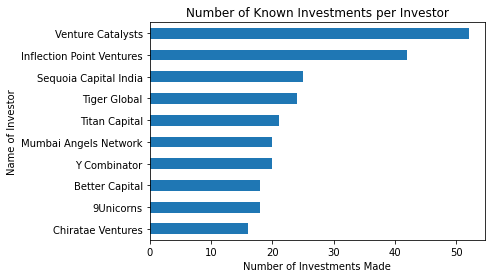

In [77]:
investors[1:].head(10).sort_values().plot.barh() # Filtering the top 10 investors by investment while excluding the "Undisclosed"
plt.xlabel("Number of Investments Made")
plt.ylabel("Name of Investor")
plt.title("Number of Known Investments per Investor")

Despite filtering out the 627 unknown investors (data not available in the dataset), we note a total of about 1,245 different investors over the period.

We also note that Venture Catalysts (52) and Inflection Point Ventures (42) made the most investments, by number of transactions, over the period. They are followed by Sequoia Capital India (25) and Tiger Global (24).

Next up, we take a look at the amounts involved in the deals by the various investors.

In [78]:
investors_set = (complete_set.groupby(by = "Investors").Amount.agg(["count","sum", "mean", "median"]).sort_values(by = "sum", ascending = False))[1:]
investors_set

,count,sum,mean,median
Investors,,,,
Silver Lake,1,70000000000.00,70000000000.00,70000000000.00
Salesforce Ventures,2,3006700000.00,1503350000.00,1503350000.00
Tiger Global,24,2356000000.00,98166666.67,75500000.00
Facebook,2,2310000000.00,1155000000.00,1155000000.00
General Atlantic,7,1647100000.00,235300000.00,200000000.00
...,...,...,...,...
Katrina Kaif,1,0.00,0.00,0.00
Kapil Dev,1,0.00,0.00,0.00
Kalyan Krishnamurthy,1,0.00,0.00,0.00


Text(0.5, 1.0, 'Value of the Total Investments by Investor')

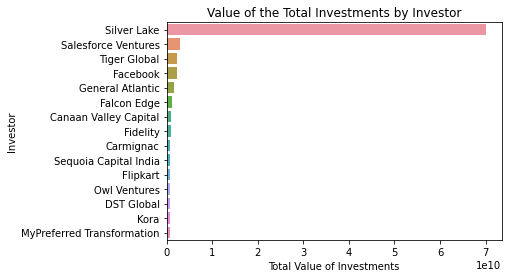

In [79]:
sns.barplot(x = (investors_set["sum"])[:15], y = (investors_set.index)[:15])
plt.xlabel("Total Value of Investments")
plt.ylabel("Investor")
plt.title("Value of the Total Investments by Investor")

Even with the foregoing, we note that Silver Lake's single deal of USD 70bn investment tops the list of investments by value. They are followed in a distance by Salesforce Ventures with 2 transactions summing up to USD 3bn, Tiger Global (24 transactions) with USD 2.356bn, Facebook (2 transactions) with USD 2.31bn, and then General Atlantic (7 transactions) with USD 1.65bn. 

This creates the impression that number of deals does not necessarily imply high value of investments since only one of the top four investors involved in deals featured in the top 5 by value of total investments. Shall we attempt confirm? Yes.

Text(0.5, 1.0, 'Total Value of Investment Deals by Investor')

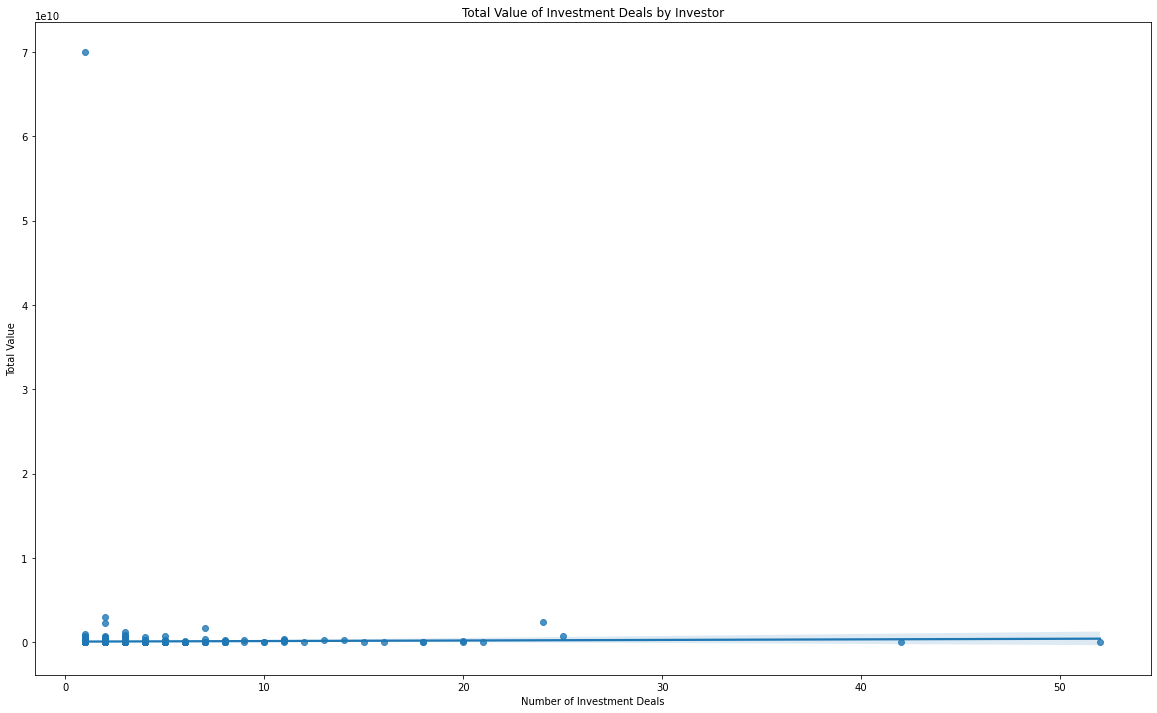

In [80]:
# Scatterplot to visualize the relationship between count of investment deals and total value of investments
plt.figure(figsize = (20,12))
sns.regplot(y = (investors_set["sum"]), x = (investors_set["count"]))
#sns.lineplot(y = (investors_set["sum"]), x = (investors_set["count"]))
plt.xlabel("Number of Investment Deals")
plt.ylabel("Total Value")
plt.title("Total Value of Investment Deals by Investor")

From the plot, it is safe to conclude that there is no relationship between the number of investment deals and the monetary value of investments. It is however noteworthy that aside Tiger Global (24), investors with less than 10 transactions seemed to have made more investments by value.

In [81]:
# Exploring the monetary value of the average investment deal by an investor
investors_set = investors_set.sort_values(by = "median", ascending = False)
investors_set.head(10)

,count,sum,mean,median
Investors,,,,
Silver Lake,1,70000000000.00,70000000000.00,70000000000.00
Salesforce Ventures,2,3006700000.00,1503350000.00,1503350000.00
Facebook,2,2310000000.00,1155000000.00,1155000000.00
Canaan Valley Capital,1,1000000000.00,1000000000.00,1000000000.00
Carmignac,1,800000000.00,800000000.00,800000000.00
MyPreferred Transformation,1,693000000.00,693000000.00,693000000.00
SoftBank Vision Fund,1,660000000.00,660000000.00,660000000.00
South Africa’s Naspers Ventures,1,540000000.00,540000000.00,540000000.00
Twitter Ventures,1,500000000.00,500000000.00,500000000.00


Text(0.5, 1.0, 'Average Value of Investments by Investor')

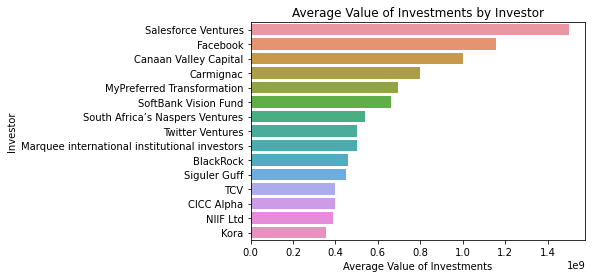

In [82]:
# Due to it's outlying effect, Silver Lake will be excluded from the visualization to have a better look at the others
sns.barplot(x = (investors_set["mean"])[1:16], y = (investors_set.index)[1:16])
plt.xlabel("Average Value of Investments")
plt.ylabel("Investor")
plt.title("Average Value of Investments by Investor")

Here, we note that Salesforce Ventures (USD 1.5bn per deal) make the best investors after Silver Lake (USD 70bn for a single deal). Facebook (USD 1.15bn per deal), Canaan Valley Capital (USD 1bn for a single deal), and Carmignac (USD 800m for a single deal) also follow in that order.

We note that the investors who made the biggest investments over the period were involved in less than 5 deals over the period. This implies that whichever startup intends to get funding from any of these investors have to get their work right. Given that these investors have invested in a variety of sectors, it is difficult to conclude that a startup is likely to land a funding deal with these top investors by investing in a particular sector. 

We must however not rule out the fact that the education sector had the most funding deals over the period and also tops this list (with the tourism & hospitality industry) as the most favoured sector (on average) by the top investors. We can therefore advice that, other things being equal, a startup that intends to get higher than average funding can consider the education sector as its first.

In [83]:
which_sectors = complete_set.loc[(complete_set["Investors"] == "Silver Lake") |
                 (complete_set["Investors"] == "Salesforce Ventures") |
                 (complete_set["Investors"] == "Facebook") |
                 (complete_set["Investors"] == "Canaan Valley Capital") |
                 (complete_set["Investors"] == "Carmignac") |
                 (complete_set["Investors"] == "MyPreferred Transformation") |
                 (complete_set["Investors"] == "SoftBank Vision Fund") |
                 (complete_set["Investors"] == "South Africa’s Naspers Ventures") |
                 (complete_set["Investors"] == "Twitter Ventures") |
                 (complete_set["Investors"] == "Marquee international institutional investors")]
print(which_sectors["Sector"].value_counts(), "\n")
which_sectors

Education                             2
Tourism & Hospitality                 2
Retail                                1
Tech                                  1
Multinational conglomerate company    1
Food & Nutrition                      1
Social media & networking             1
Software                              1
Travel & Transport                    1
Innovation management                 1
Name: Sector, dtype: int64 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
541,Byju's,Education,Undisclosed,540000000.00,Unknown Location,Provides online learning classes,2019,2011,Byju Raveendran,South Africa’s Naspers Ventures
610,Oyo,Tourism & Hospitality,Undisclosed,693000000.00,Gurgaon,Provides rooms for comfortable stay,2019,2013,Ritesh Agarwal,MyPreferred Transformation
892,Reliance retail ventures ltd,Retail,Undisclosed,70000000000.00,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006,Mukesh Ambani,Silver Lake
929,Snowflake,Tech,Undisclosed,3000000000.00,California,Snowflake is a cloud data platform that provid...,2020,2012,Benoit Dageville,Salesforce Ventures
940,Reliance,Multinational conglomerate company,Undisclosed,2200000000.00,Mumbai,Reliance owns businesses across India engaged ...,2020,1973,Dhirubhai Ambani,Facebook
1507,Unacademy,Education,Series E,110000000.00,Bangalore,Platform that offers online education in India,2020,2010,Gaurav Munjal,Facebook
1717,Swiggy,Food & Nutrition,Undisclosed,800000000.00,Bangalore,Swiggy is an on-demand food delivery platform ...,2021,2014,Nandan Reddy,Carmignac
1734,Sharechat,Social media & networking,Undisclosed,500000000.00,Bangalore,ShareChat is a social networking and regional ...,2021,2015,Ankush Sachdeva,Twitter Ventures
1801,Hashnode,Software,Series A,6700000.00,Bangalore,The easiest way to start a blog on personal do...,2021,2016,Syed Fazle Rahman,Salesforce Ventures
1912,Ola,Travel & Transport,Undisclosed,500000000.00,Bangalore,Ola is India’s largest mobility platform and o...,2021,2010,Bhavish Aggarwal,Marquee international institutional investors


# 4.0 More Analyses & Visualizations

In [84]:
complete_set

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,Thecollegefever,"Advertising, marketing & sales",Seed,250000.00,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,nan,Unknown Founder,Undisclosed
1,Happy cow dairy,Agriculture & agritech,Seed,584000.00,Mumbai,A startup which aggregates milk from dairy far...,2018,nan,Unknown Founder,Undisclosed
2,Myloancare,Financial Services,Series A,949000.00,Gurgaon,Leading Online Loans Marketplace in India,2018,nan,Unknown Founder,Undisclosed
3,Payme india,Financial services,Angel,2000000.00,Noida,PayMe India is an innovative FinTech organizat...,2018,nan,Unknown Founder,Undisclosed
4,Eunimart,E-commerce,Seed,0.00,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,nan,Unknown Founder,Undisclosed
...,...,...,...,...,...,...,...,...,...,...
2853,Werize,Financial services,Series A,8000000.00,Bangalore,India’s first socially distributed full stack ...,2021,2019,Vishal Chopra,3one4 Capital
2854,Peel works,Saas,Series D,2840000.00,Mumbai,Unknown,2020,2010,Sachin Chhabra,CESC
2855,Peel works,Saas,Series D,2000000.00,Mumbai,Unknown,2020,2010,Sachin Chhabra,Undisclosed
2856,Peel works,Saas,Debt,1000000.00,Mumbai,Unknown,2020,2010,Sachin Chhabra,BlackSoil


In [85]:
complete_set.loc[complete_set["Amount"] > 0.00]

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,Thecollegefever,"Advertising, marketing & sales",Seed,250000.00,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,nan,Unknown Founder,Undisclosed
1,Happy cow dairy,Agriculture & agritech,Seed,584000.00,Mumbai,A startup which aggregates milk from dairy far...,2018,nan,Unknown Founder,Undisclosed
2,Myloancare,Financial Services,Series A,949000.00,Gurgaon,Leading Online Loans Marketplace in India,2018,nan,Unknown Founder,Undisclosed
3,Payme india,Financial services,Angel,2000000.00,Noida,PayMe India is an innovative FinTech organizat...,2018,nan,Unknown Founder,Undisclosed
5,Hasura,Cloud computing,Seed,1600000.00,Bangalore,Hasura is a platform that allows developers to...,2018,nan,Unknown Founder,Undisclosed
...,...,...,...,...,...,...,...,...,...,...
2853,Werize,Financial services,Series A,8000000.00,Bangalore,India’s first socially distributed full stack ...,2021,2019,Vishal Chopra,3one4 Capital
2854,Peel works,Saas,Series D,2840000.00,Mumbai,Unknown,2020,2010,Sachin Chhabra,CESC
2855,Peel works,Saas,Series D,2000000.00,Mumbai,Unknown,2020,2010,Sachin Chhabra,Undisclosed
2856,Peel works,Saas,Debt,1000000.00,Mumbai,Unknown,2020,2010,Sachin Chhabra,BlackSoil


After the final touches to the dataset, we have a total of **2,858 deals** from 2018 to 2021, with 2,310 (80%) deals having disclosed the amounts involved. Since the deals with amounts undisclosed and/or unavailable are about 20% of the complete dataset, it would be prudent to work with the whole dataset as is without exluding the deals without amounts.

### 4.1 What We've Learnt So Far

1. Bharatpe (10), Byju's (10) and Zomato (7) were the startups involved in most deals over the period. They are headquartered in 3 different locations and operate in 3 different sectors.

2. Startups in the education (279), fintech (258), and medicine & healthcare (227) sectors were involved in most transactions over the period, with financial services (166) and e-commerce (158) following in distance. The top 10 out of 595 sectors, by number of deals, make up about 53% of the total deals over the period hence it will be fair to conclude that funding is centralized around a few sectors. That education, fintech and medicine & healthcare are miles ahead of the rest nails it down further.

3. For the deals with disclosed rounds/stages, Seed round had the most deals by a mile (924) followed by Series A (310) and Pre-Series A (289), with Series B and Series C following in the distance with 134 and 114 deals respectively.

4. Over 16% of the data available are outliers so it would be unwise to remove all of them. At USD 121.27m with them and USD 25.90m without them, the effects of the 2 biggest outliers on the mean is evident. This represents a USD 95.37m difference between the two datasets. In view of these, the median of USD 3m will be used for analyses for the "average" startup. i.e. the average funding deal over the period was worth USD 3m.

5. Bangalore (916) led the pack (as the city with most startups involved in deals) by almost twice as much as the next location, Mumbai, which had 471 deals. Gurgaon (317), New Delhi (230), Chennai (106), and Pune (104) followed in that order. These made up about 75% of the total transactions over the period, pointing to part acceptance of the null hypothesis which posits that funding to startups is centralized around specific locations and sectors.

6. Despite the big drop in 2019, the number of funding deals is increasing per year - from 525 in 2018 to 1,190 in 2021. This implies that chances are fairly high that a new startup would be able to land a funding deal going forward since the number of deals is on an increasing trajectory. 

7. In line with the increasing number of deals over the period, total amounts invested have been increasing over the period, with investments in 2021 having the highest monetary value. Also, despite 2018 having a higher number of transactions, the average amount per deal (USD 12.7bn) was significantly less than that of 2019 (USD 37.5bn) which had 89 deals.

8. Newer startups were involved in more funding deals, with an overall increase from startups founded in 2000. 2021's low value may imply lower chances of landing a funding deal in the same year that a startup was founded. As such, it is fair to say that other sources of finance may be used in the first year of founding before actively seeking a funding deal down the line. This is further highlighted by the observation that startups founded in 2018 raised the most funds over the period, followed by 2006 and then other startups founded after 2009.

9. Out of about 1,245 different known investors over the period, Venture Catalysts (52) and Inflection Point Ventures (42) made the most investments, by number of deals. They were followed by Sequoia Capital India (25) and Tiger Global (24).

10. Even with the foregoing, Silver Lake's single USD 70bn investment tops the list of investments by value. This is followed in a distance by Salesforce Ventures (2 deals) summing up to USD 3bn, Tiger Global (24 deals) with USD 2.36bn, Facebook (2 deals) with USD 2.31bn, and then General Atlantic (7 deals) with USD 1.65bn.  

11. Note 10 above creates the impression that number of deals does not necessarily imply high value of investments since only one of the top four investors involved in deals featured in the top 5 by value of total investments. This is also highlighted by the plot which showed little to no relationship between the two. It is however noteworthy that aside Tiger Global (24), investors with less than 10 transactions seemed to have made more investments by value.

12. Using the average value per deal, Salesforce Ventures (USD 1.5bn per deal) make the best investors after Silver Lake (USD 70bn for a single deal). Facebook (USD 1.15bn per deal), Canaan Valley Capital (USD 1bn for a single deal), and Carmignac (USD 800m for a single deal) also follow in that order. These investors who made the biggest investments over the period were involved in less than 5 deals. This implies that whichever startup intends to get funding from any of these investors will have to get their work right. 

13. Given that the top investors invested in a variety of sectors, it is difficult to conclude that a startup is likely to land a funding deal with these top investors by investing in a particular sector. We must however not rule out the fact that the education sector had the most funding deals over the period and also tops the list (with the tourism & hospitality industry) as the most favoured sector (on average) by the top investors. We can therefore advice that, other things being equal, a startup that intends to get higher than average funding can consider the education sector as its first.

## More Questions

### 4.2 How is funding distributed across deals by location?

In [86]:
by_location = complete_set.groupby(by = "Headquarters").Amount.agg(["count", "sum", "mean", "median"]).sort_values(by = "sum", ascending = False)
by_location.head(10)

,count,sum,mean,median
Headquarters,,,,
Mumbai,471,230811847986.00,490046386.38,2000000.00
Bangalore,916,24170275334.00,26386763.47,2200000.00
Gurgaon,317,6936987680.00,21883241.89,2800000.00
New Delhi,230,3421582173.00,14876444.23,1000000.00
California,6,3078300000.00,513050000.00,1650000.00
Unknown,94,1467760600.00,15614474.47,2500000.00
Pune,104,1395938705.00,13422487.55,1000000.00
Chennai,106,1123975826.00,10603545.53,2000000.00
Haryana,26,918985000.00,35345576.92,6250000.00


Text(0.5, 1.0, 'Distribution of Investments per City')

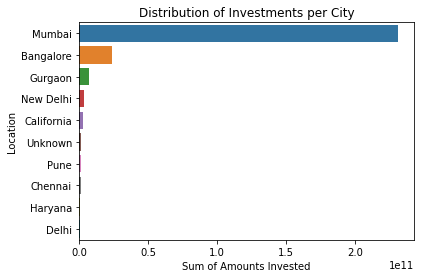

In [87]:
sns.barplot(y = (by_location.index)[:10], x = (by_location["sum"])[:10])
plt.xlabel("Sum of Amounts Invested")
plt.ylabel("Location")
plt.title("Distribution of Investments per City")

In [88]:
# What is the sum total of investments over the period?
total_investments = complete_set.Amount.sum()
print("The sum total of investments over the period was USD " + str(complete_set.Amount.sum()), "\n")

The sum total of investments over the period was USD 279777511482.0 



In [89]:
mumbai_percent = (230811847986.00/total_investments)*100
bangalore_percent = (24170275334.00/total_investments)*100

print("Mumbai-based startups took up " + str(mumbai_percent) + "% of total amounts invested over the period.", "\n", 
      "Bangalore-based startups followed with " + str(bangalore_percent) + "% of total amounts invested over the period.", "\n")

Mumbai-based startups took up 82.49835619860022% of total amounts invested over the period. 
 Bangalore-based startups followed with 8.639105840197251% of total amounts invested over the period. 



Looking at the total value of deals by location, Mumbai leads with USD 230bn from 471 deals, averaging about USD 490m per deal. Bangalore (916 deals) follows in a distance with USD 24bn at USD 26m per deal. The top 5 is completed with Gurgaon-headquartered  startups (317 deals) receiving USD 6.9bn (USD 21.9m average), New Delhi-headquartered startups (230 deals) receiving USD 3.4bn (USD 14.9m average), and California-based startups (6 deals) receiving USD 3bn in funding at an average of USD 513m.

We also note that startups headquartered in Mumbai and Bangalore alone got a cumulative 91% of the total funding over the period. This matches the null hypothesis that funding to startups is centralized around specific locations. *Based on this, the team may be advised to consider Mumbai as the first choice for the headquarters of the potential startup.*

### 4.3 Does number of deals translate into funding for the sectors?

In [90]:
# Recap of the top 10 sectors by number of deals
unique_sectors.head(10)

Education                    278
Fintech                      259
Medicine & healthcare        227
E-commerce                   158
Financial services           144
Food & Nutrition             137
Agriculture & agritech        85
Automobiles & automotives     81
Logistics & supply chain      70
Consumer goods & services     62
Name: Sector, dtype: int64

In [91]:
sector_wise = complete_set.groupby(by = "Sector").Amount.agg(["count", "sum", "mean", "median"]).sort_values(by = "sum", ascending = False)
sector_wise.head(10)

,count,sum,mean,median
Sector,,,,
Fintech,259,154792358725.00,597653894.69,5000000.00
Retail,29,70550380000.00,2432771724.14,4000000.00
Education,278,6380219556.00,22950430.06,1000000.00
E-commerce,158,4700024800.00,29746992.41,3850000.00
Food & Nutrition,137,4204991000.00,30693364.96,1000000.00
Financial services,144,3507928700.00,24360615.97,3350000.00
Tech,39,3470983900.00,88999587.18,1000000.00
Automobiles & automotives,81,2962017246.00,36568114.15,3000000.00
Medicine & healthcare,227,2802364745.00,12345219.14,1500000.00


Text(0.5, 1.0, 'Total Value of Investments by Sector')

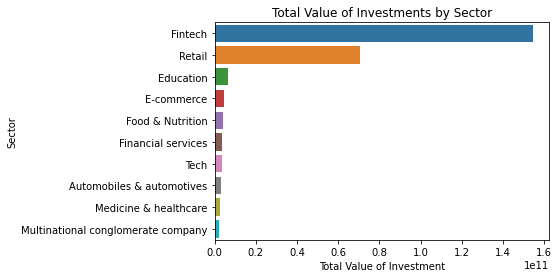

In [92]:
# Visualizing the top 10 sectors by total funding received by it's startups
sns.barplot(y = sector_wise[:10].index, x = (sector_wise["sum"])[:10])
plt.xlabel("Total Value of Investment")
plt.ylabel("Sector")
plt.title("Total Value of Investments by Sector")

In [93]:
# Total percentage of funding to 
fintech_percent = (154792358725.00/total_investments)*100
retail_percent = (70550380000.00/total_investments)*100
fintech_percent+retail_percent

80.54354959815913

Text(0.5, 1.0, 'Median Value of Investments by Sector')

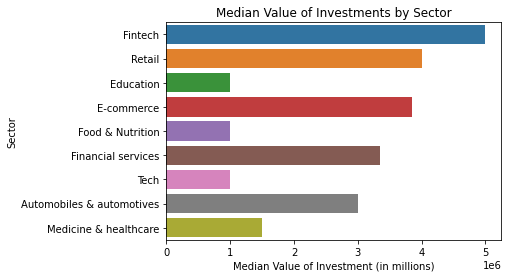

In [94]:
# Visualizing the median amounts invested per sector
sns.barplot(y = sector_wise[:9].index, x = (sector_wise["median"])[:9]) # Excluding the "Multinational conglomerate company"
plt.xlabel("Median Value of Investment (in millions)")
plt.ylabel("Sector")
plt.title("Median Value of Investments by Sector")

Given that 7 out of the 10 sectors whose startups had the most deals were in the top 10 startups by funding received, we can conclude that number of deals has a positive relationship with the amount of funding. The Fintech sector led this time, receiving a total of USD 154bn with USD 5m as the median amount. Retail (USD 70bn total) came second with a USD 4m median, followed in order by the education (USD 6bn total) with a USD 1m median, e-commerce (USD 4.7bn total) with a USD 3.85m, and food & nutirition (USD 5bn total)

From the second graph, we note that by total amounts invested, the Fintech sector (55%) and the Retail sector (25%) make up 80% of total funding received. By median value of investments, Fintech still leads the race, followed by Retail, E-commerce, Financial Services, and Automobiles and Automotives, in that order.

These add to the assertion that funding is centralized around specific sectors.

### 4.4 What is the average amount of funding for start-ups in: the sector with most funding, and the location with most funding?

From earlier analyses, we know that the sector with the most funding is the Fintech sector with a total of USD 154bn, an average of USD 597m per deal, and USD 5m per deal median. For the location with most funding, we learnt that it was Mumbai with a total of USD 230bn, an average of USD 490m per deal and a USD 2m median.

In [95]:
# Reminding ourselves of the summary stats of the amounts involved in deals over the period.
complete_set["Amount"].describe()

count           2858.00
mean        97892761.19
std       3096895060.38
min                0.00
25%           204750.00
50%          1600000.00
75%          8000000.00
max     150000000000.00
Name: Amount, dtype: float64

From the description of the Amount column, we learn that the average deal over the period was worth USD 97m on average, and USD 1.6m median. 

Great. So how much did startups at the intersection of Mumbai and the Fintech sector receive per deal, and how does it compare to the sector, location, and general averages?

In [96]:
# Extracting data for deals involving startups in the Fintech sector and headquartered in Mumbai
max_intersection = complete_set.loc[(complete_set["Headquarters"] == "Mumbai") & 
                (complete_set["Sector"] == "Fintech")]
max_intersection

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
453,Livquik,Fintech,Corporate,2700000.00,Mumbai,LivQuik was incorporated with the vision to si...,2018,nan,Unknown Founder,Undisclosed
636,Taxbuddy.com,Fintech,Undisclosed,1000000.00,Mumbai,TaxBuddy for any tax related issues.,2020,2019,Sujit Bangar,Zenith Global
639,Coindcx,Fintech,Series B,10000000.00,Mumbai,CoinDCX is a company that specializes in crypt...,2020,2017,Neeraj Khandelwal,Coinbase Ventures
764,Blacksoil,Fintech,Undisclosed,10000000.00,Mumbai,Blacksoil Advisory is an independent boutique ...,2020,2016,Ankur Bansal,Undisclosed
805,Flexiloans,Fintech,Debt,6000000.00,Mumbai,an online lending platform started with an end...,2020,2016,Abhishek Kothari,>Vikram Sud
809,Credable,Fintech,Undisclosed,4500000.00,Mumbai,CredAble provides working capital & supply cha...,2020,2017,Nirav Choksi,Oaks Asset Management
830,Getvantage,Fintech,Seed,5000000.00,Mumbai,GetVantage is India and Southeast Asia's first...,2020,2019,Amit Srivastava,Samyakth Capital
889,Uni,Fintech,Seed,18500000.00,Mumbai,The team aims to bridge the gap for credit car...,2020,nan,Nitin Gupta,Lightspeed India Partners
890,Credit wise capital,Fintech,Seed,6000000.00,Mumbai,CreditWise Capital is a consumer finance company.,2020,2018,Hirak Joshi,Venture Catalysts
919,Avanse financial services,Fintech,Undisclosed,15000000.00,Mumbai,"Avanse, regulated by the Reserve Bank of India...",2020,2012,Amit Gainda,International Finance Corporation


In [97]:
print(max_intersection["Amount"].sum(), "\n")
max_intersection.describe()

150318899700.0 



,Amount
count,48.00
mean,3131643743.75
std,21649657875.46
min,0.00
25%,1000000.00
50%,3868500.00
75%,8500000.00
max,150000000000.00


First we note that startups that fall within the intersection of Mumbai and Fintech were involved in a total of 48 deals worth a cumulative USD 150bn over the period.

Second, we note that each deal had an average worth of about USD 3bn, and a median of USD 3.8m. This implies that startups in the Fintech sector and headquartered in Mumbai receive more funding per deal on average. The median per deal is second to the median funding per deal of the Fintech sector. Based on these, it is safe to say that the intersection of Fintech and Mumbai is a sweet spot anyone who intends to venture into the Indian startup space may want to explore.

The above data is summarized in the below.

In [98]:
data = {"Grouping":["General","Fintech sector","Mumbai-based","Fintech & Mumbai"],
       "Mean Funding":["97,892,761.19", "597,653,894.69", "490,046,386.38", "3,131,643,743.75"],
       "Median Funding":["1,600,000.00", "5,000,000.00", "2,000,000.00", "3,868,500.00"]}
data_summarized = pd.DataFrame(data)
data_summarized

,Grouping,Mean Funding,Median Funding
0,General,"97,892,761.19","1,600,000.00"
1,Fintech sector,"597,653,894.69","5,000,000.00"
2,Mumbai-based,"490,046,386.38","2,000,000.00"
3,Fintech & Mumbai,"3,131,643,743.75","3,868,500.00"


### 4.5 How does the breakdown by stages of funding look?

In [99]:
stage_wise = complete_set.groupby(by = "Funding Stage").Amount.agg(["count", "sum", "mean", "median"]).sort_values(
    by = "sum", ascending = False)
stage_wise

,count,sum,mean,median
Funding Stage,,,,
Debt,61,150735971025.00,2471081492.21,5000000.00
Undisclosed,924,99637358054.00,107832638.59,1500000.00
Series C,114,5394693700.00,47321874.56,30000000.00
Series B,134,3755631600.00,28027101.49,16000000.00
Series D,53,3645842160.00,68789474.72,53000000.00
Series E,29,3430977000.00,118309551.72,96000000.00
Series A,310,2949612920.00,9514880.39,5000000.00
Series H,4,2312500000.00,578125000.00,635000000.00
Private Equity,11,2154000000.00,195818181.82,41900000.00


Text(0.5, 1.0, 'Total Amount Invested per Funding Stage/Round')

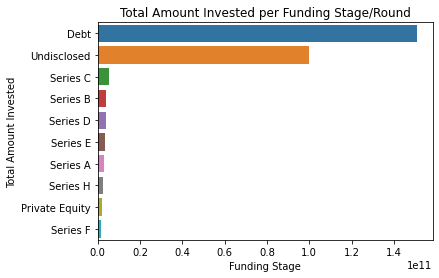

In [100]:
# Plotting the top 10 stages/rounds of funding in terms of amounts invested
sns.barplot(y = stage_wise[:10].index, x = (stage_wise["sum"])[:10])
plt.xlabel("Funding Stage")
plt.ylabel("Total Amount Invested")
plt.title("Total Amount Invested per Funding Stage/Round")

As noted earlier, a large portion of the funding stages was undisclosed. For those that were disclosed, a debt (61 deals) was the most common type of funding with a total investment of USD 150bn (USD 2bn average). This was followed in the distance by Series C (USD 5bn), Series B (USD 3.8bn), and Series D (USD 3.6), with each averaging USD 47m, USD 28m, and USD 69m respectively.

The Seed round, which had the highest number of deals*, had about USD 1.5m per deal, which should be good enough to hold a startup down for sometime as it focuses on survival and other funding sources.

### 4.6 Which startups were most favoured by investors?

In [101]:
company_wise = complete_set.groupby(by = "Company Name").Amount.agg(["count", "sum", "mean"]).sort_values(by = "sum",
                                                                                                         ascending = False)
company_wise.head(10)

,count,sum,mean
Company Name,,,
Alteria capital,1,150000000000.00,150000000000.00
Reliance retail ventures ltd,1,70000000000.00,70000000000.00
Snowflake,1,3000000000.00,3000000000.00
Byju's,10,2522000000.00,252200000.00
Reliance,1,2200000000.00,2200000000.00
Swiggy,4,1956000000.00,489000000.00
Oyo,6,1665000000.00,277500000.00
Verse innovation,3,1550000000.00,516666666.67
Dream sports,2,1240000000.00,620000000.00


Looking at the number of deals, the most favoured startups were Byju's (10), Bharatpe (10) and Zomato (7). On the other hand, when we assess by the amount of funding received, Alteria Capital (USD 150bn), Reliance retail ventures ltd (USD 70bn), and Snowflake (USD 3bn) were the investors' favorites. Byju's, Zomato, and Oyo make the top 10 in both assessments implying that they are well favoured by investors both by number of deals and by amounts received.

# 5.0 Conclusions and Recommendations

### 5.1 the Hypothesis

With the above in mind, it is safe to accept the null hypothesis, given that funding to startups over the period was centralized around particular locations (Mumbai and Bangalore) and particular sectors (Fintech and Retail)

### 5.2 Advice to the Team

- Prioritize the fintech, retail, and education sectors for further studies into the possible establishment of the startup.
- Prioritize Bangalore, Mumbai and Gurgaon as the possible locations for the startup.
- The likeliest source of funding is debt, which may come with some conditionalities. It is then followed by Series C and Series B. Even so, an average startup gets an average of about USD 1.5m at the Seed round.
- Seek alternative sources of funding during the early years, as you target survival and growth, as funding usually comes in after a year or two of establishment.

Thanks for reading. I will be grateful for your comments and recommendations. Please do not hesitate to reach out if you have any questions or identify any areas for improvement.

Kind regards,
Kwame.